In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib qt

In [88]:
datas = []
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = sch.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('students')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [89]:
# stu_Z = hierarchy.linkage(stu_dist, 'single')
# print(stu_Z)
# plt.figure()
# # plt.xlabel('students')
# # dn = hierarchy.dendrogram(stu_Z)
# # plt.show()
# fancy_dendrogram(
#     stu_Z,
# #     truncate_mode='lastp',
#     p=12,
#     leaf_rotation=90.,
# #     leaf_font_size=12.,
#     show_contracted=True,
#     annotate_above=10,  # useful in small plots so annotations don't overlap
# )
# plt.show()

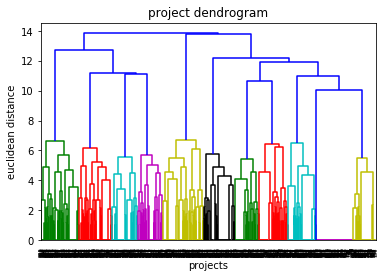

In [90]:
# tech_csv_path = "test_files/temp_tech_formal_context.csv"
tech_csv_path = "testing/project_formal_context_1000.csv"

tech_array = pd.read_csv(tech_csv_path).replace([np.nan,'X'],[0, 1]).iloc[:,1:].values
# display(tech_array)
tech_Z = sch.linkage(tech_array,'ward')

plt.figure("project dendogram")
dg = sch.dendrogram(tech_Z)
plt.xlabel('projects')
plt.ylabel('euclidean distance')
plt.title('project dendrogram')
plt.show()
total_skills = tech_array.shape[1]
total_projects = tech_array.shape[0]

In [61]:
# tech_Z = sch.linkage(tech_array, 'ward')
# # print(stu_Z)
# # plt.figure()
# # plt.xlabel('students')
# # dn = hierarchy.dendrogram(stu_Z)
# # plt.show()
# fancy_dendrogram(
#     tech_Z,
# #     truncate_mode='lastp',
#     p=12,
# #     leaf_rotation=90.,
# #     leaf_font_size=12.,
# #     show_contracted=True,
# #     annotate_above=10,  # useful in small plots so annotations don't overlap
# )
# plt.show()

In [91]:
from sklearn.cluster import AgglomerativeClustering
tech_cluster_num = 11
agg_model_tech = AgglomerativeClustering(n_clusters=tech_cluster_num, affinity='euclidean', linkage='ward')
y_pred_tech = agg_model_tech.fit_predict(tech_array)

tech_groups = []

for i in range(tech_cluster_num):
    tech_groups.append(tech_array[y_pred_tech == i])

# tech_group1 = tech_array[y_pred==0]
# tech_group2 = tech_array[y_pred==1]
# tech_group3 = tech_array[y_pred==2]
# tech_group4 = tech_array[y_pred==3]
tech_group_skills = []
for i in range(tech_cluster_num):
    skills = tech_groups[i][0]
    for j in range(1,len(tech_groups[i])):
        skills = np.logical_or(skills, tech_groups[i][j])
    tech_group_skills.append(skills)


tech_concepts = []
for i in range(tech_cluster_num):
    concept = np.concatenate([tech_group_skills[i],y_pred_tech == i]).astype(int)
    tech_concepts.append(concept)

tech_concepts
# tech_skill1 = tech_group1[0]
# for i in range(1,len(tech_group1)):
#     tech_skill1 = np.logical_or(tech_skill1,tech_group1[i])

# tech_skill2 = tech_group2[0]
# for i in range(1,len(tech_group2)):
#     tech_skill2 = np.logical_or(tech_skill2,tech_group2[i])

# tech_skill3 = tech_group3[0]
# for i in range(1,len(tech_group3)):
#     tech_skill3 = np.logical_or(tech_skill3,tech_group3[i])

# tech_skill4 = tech_group1[0]
# for i in range(1,len(tech_group1)):
#     tech_skill1 = np.logical_or(tech_skill1,tech_group1[i])


[array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 1]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 0, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 1, 1, 0])]

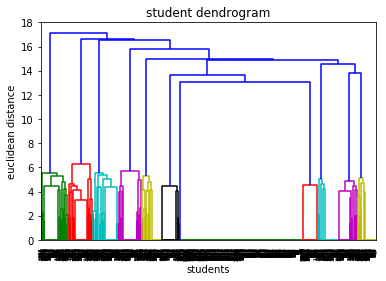

In [93]:
# stu_csv_path = "test_files/temp_student_formal_context.csv"
stu_csv_path = "testing/student_formal_context_2000.csv"

stu_array = pd.read_csv(stu_csv_path).replace([np.nan,'X'],[0, 1]).iloc[:,1:].values

stu_Z = sch.linkage(stu_array,'ward')

plt.figure('student dendogram')
dg = sch.dendrogram(stu_Z)
# plt.plot([0,100],[7.8,7.8],c='black')
plt.xlabel('students')
plt.ylabel('euclidean distance')
plt.title('student dendrogram')
plt.show()
total_students = stu_array.shape[0]

In [64]:
# # stu_Z = sch.linkage(stu_array, 'ward')
# # print(stu_Z)
# # plt.figure()
# # plt.xlabel('students')
# # dn = hierarchy.dendrogram(stu_Z)
# # plt.show()
# fancy_dendrogram(
#     stu_Z,
# #     truncate_mode='lastp',
#     p=12,
# #     leaf_rotation=90.,
# #     leaf_font_size=12.,
# #     show_contracted=True,
# #     annotate_above=10,  # useful in small plots so annotations don't overlap
# )
# plt.show()

In [94]:
from sklearn.cluster import AgglomerativeClustering
stu_cluster_count = 11
agg_model_stu = AgglomerativeClustering(n_clusters=stu_cluster_count, affinity='euclidean', linkage='ward')
y_pred_stu = agg_model_stu.fit_predict(stu_array)

stu_groups = []

for i in range(stu_cluster_count):
    stu_groups.append(stu_array[y_pred_stu == i])

stu_group_skills = []
for i in range(stu_cluster_count):
    skills = stu_groups[i][0]
    for j in range(1,len(stu_groups[i])):
        skills = np.logical_or(skills, stu_groups[i][j])
    stu_group_skills.append(skills)


stu_concepts = []
for i in range(stu_cluster_count):
    concept = np.concatenate([stu_group_skills[i],y_pred_stu == i]).astype(int)
    stu_concepts.append(concept)

stu_concepts

[array([1, 0, 1, ..., 0, 0, 1]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0])]

In [95]:
def generate_affinity_matrix(team_concept, task_concept, a=0, b=0, c=2, d=1):
    mat = [[0 for j in range(len(task_concept))] for i in range(len(team_concept))]

    for i in range(len(team_concept)):
        for j in range(len(task_concept)):
            for k in range(total_skills):
                if team_concept[i][k] == 1 and task_concept[j][k] == 1:
                    mat[i][j] = mat[i][j] + a * team_concept[i][k]
                elif team_concept[i][k] == 0 and task_concept[j][k] == 0:
                    mat[i][j] = mat[i][j] + b
                elif team_concept[i][k] == 1 and task_concept[j][k] == 0:
                    mat[i][j] = mat[i][j] - c * team_concept[i][k]
                else:
                    mat[i][j] = mat[i][j] - d

    return mat


def generate_pref(mat, r_c_val, isRow=True):
    tup_list = list()
    for i in range(len(mat[0]) if isRow else len(mat)):
        if isRow:
            tup_list.append((mat[r_c_val][i], i))
        else:
            tup_list.append((mat[i][r_c_val], i))

    def sort_by_val(elem):
        return elem[0]

    sorted_list = sorted(tup_list, key=sort_by_val, reverse=True)

    pref_list = list()

    for val, i in sorted_list:
        pref_list.append(i)

    return pref_list


# hospital/resident problem
# pref_1 = hospital pref.   pref_2 = resident_pref.
def extended_sma(pref_1, pref_2):
    pairs = list()
    res_partner = dict()
    res_count_in_pref = len(pref_1.keys()) * len(pref_2.keys())

    while res_count_in_pref > 0:
        print(pairs)
        # for each hospital
        for h, pref in pref_1.items():
            # print("for h=",h)
            # for each resident in pref.
            for r in pref:
                # if already paired with ith hospital
                # print("for r=",r)
                if (h, r) in pairs:
                    # print("already found!")
                    continue
                elif r in res_partner:
                    # print("pair found n breaking")
                    pairs.remove((res_partner[r], r))
                    res_partner.pop(r)
                    res_count_in_pref += 1
                # print("paired",(h,r))
                pairs.append((h, r))
                res_partner[r] = h
                res_count_in_pref -= 1

                # for each successor h_ of h in r's pref. remove h_ and r from each other
                # using index from h+1 to end of r's pref
                # print("h found in r's pref. at ",pref_2[r].index(h),"len of r's pref. is",len(pref_2[r]))
                hpos = pref_2[r].index(h)
                for h_i in range(hpos + 1, len(pref_2[r])):
                    # print("removing h_(s) n r h_=",pref_2[r][hpos+1],"h_i=",h_i,"pref.=",pref_2[r])
                    # removing r from h_'s pref
                    pref_1[pref_2[r][hpos + 1]].remove(r)
                    res_count_in_pref -= 1
                    # removing h_ from r's pref
                    pref_2[r].pop(hpos + 1)

                break
        # check if any h's pref. still left with unallocated resident
        # if so then break
        # edit this //////////////////////////////////////////////////////////////////////////here////////
        # if len(res_partner.keys()) == len(pref_2.keys()):
        #     print("done quiting sma")
        #     break

    return pairs


In [96]:

print("---------------------------------------------------------------------------")
aff_mat = generate_affinity_matrix(stu_concepts, tech_concepts, 1, 1, 1, 1)
print("---------------------------------------------------------------------------")
print("aff mat")
for row in aff_mat:
    for val in row:
        print("{:3}".format(val), end="|")
    print()


---------------------------------------------------------------------------
---------------------------------------------------------------------------
aff mat
  8|  8|  8|  6|  4|  6|  8|  8|  8|  4| -8|
  8|  8|  8|  6|  4|  6|  8|  4|  8|  4| -8|
  6|  6|  6|  4|  2|  8|  6|  6|  6|  2| -6|
  8|  8|  8|  6|  4|  2|  8|  4|  8|  4| -8|
 10| 10| 10|  8|  6|  4| 10|  6| 10|  6|-10|
 -6| -6| -6| -4| -2|  0| -6| -2| -6|-10|  6|
  8|  8|  8|  6|  4|  2|  8|  4|  8|  4| -8|
  0|  0|  0| -2| -4|  6|  0|  0|  0| -4|  0|
  8|  8|  8|  6|  4|  6|  8|  4|  8|  4| -8|
 -2| -2| -2|  0|  2|  0| -2|  2| -2| -2|  2|
-10|-10|-10| -8| -6| -4|-10| -6|-10| -6| 10|


In [97]:
# task concept preference
task_c_pref = dict()
# student concept preference
stu_c_pref = dict()

# print(generate_pref(aff_mat,0,False))
# generating pref order for student concepts
for stu_c_i in range(len(aff_mat)):
    stu_c_pref[stu_c_i] = generate_pref(aff_mat, stu_c_i, True)

print("---------------------------------------------------------------------------")
print("student cluster preferences")
for k, v in stu_c_pref.items():
    print(k, v)

# generating pref order for abstract concepts
for task_c_i in range(len(aff_mat[0])):
    task_c_pref[task_c_i] = generate_pref(aff_mat, task_c_i, False)

print("project cluster preferences")
for k, v in task_c_pref.items():
    print(k, v)


---------------------------------------------------------------------------
student cluster preferences
0 [0, 1, 2, 6, 7, 8, 3, 5, 4, 9, 10]
1 [0, 1, 2, 6, 8, 3, 5, 4, 7, 9, 10]
2 [5, 0, 1, 2, 6, 7, 8, 3, 4, 9, 10]
3 [0, 1, 2, 6, 8, 3, 4, 7, 9, 5, 10]
4 [0, 1, 2, 6, 8, 3, 4, 7, 9, 5, 10]
5 [10, 5, 4, 7, 3, 0, 1, 2, 6, 8, 9]
6 [0, 1, 2, 6, 8, 3, 4, 7, 9, 5, 10]
7 [5, 0, 1, 2, 6, 7, 8, 10, 3, 4, 9]
8 [0, 1, 2, 6, 8, 3, 5, 4, 7, 9, 10]
9 [4, 7, 10, 3, 5, 0, 1, 2, 6, 8, 9]
10 [10, 5, 4, 7, 9, 3, 0, 1, 2, 6, 8]
project cluster preferences
0 [4, 0, 1, 3, 6, 8, 2, 7, 9, 5, 10]
1 [4, 0, 1, 3, 6, 8, 2, 7, 9, 5, 10]
2 [4, 0, 1, 3, 6, 8, 2, 7, 9, 5, 10]
3 [4, 0, 1, 3, 6, 8, 2, 9, 7, 5, 10]
4 [4, 0, 1, 3, 6, 8, 2, 9, 5, 7, 10]
5 [2, 0, 1, 7, 8, 4, 3, 6, 5, 9, 10]
6 [4, 0, 1, 3, 6, 8, 2, 7, 9, 5, 10]
7 [0, 2, 4, 1, 3, 6, 8, 9, 7, 5, 10]
8 [4, 0, 1, 3, 6, 8, 2, 7, 9, 5, 10]
9 [4, 0, 1, 3, 6, 8, 2, 9, 7, 10, 5]
10 [10, 5, 9, 7, 2, 0, 1, 3, 6, 8, 4]


In [98]:
print("sma")
# pairss = extended_sma(h_pref,r_pref)
concept_pairs = extended_sma(task_c_pref, stu_c_pref)

print("---------------------------------------------------------------------------")
print("project cluster-student cluster pairs")
print(concept_pairs)

sma
[]
[(0, 4), (1, 0), (2, 1), (5, 2), (6, 3), (7, 8), (8, 6), (9, 9), (10, 10)]
[(0, 4), (5, 2), (10, 10), (0, 0), (1, 1), (2, 3), (4, 9), (5, 7), (6, 6), (8, 8), (10, 5)]
[(0, 4), (5, 2), (10, 10), (0, 0), (4, 9), (5, 7), (10, 5), (0, 1), (1, 3), (2, 6), (6, 8)]
[(0, 4), (5, 2), (10, 10), (0, 0), (4, 9), (5, 7), (10, 5), (0, 1), (0, 3), (1, 6), (2, 8)]
[(0, 4), (5, 2), (10, 10), (0, 0), (4, 9), (5, 7), (10, 5), (0, 1), (0, 3), (0, 6), (1, 8)]
---------------------------------------------------------------------------
project cluster-student cluster pairs
[(0, 4), (5, 2), (10, 10), (0, 0), (4, 9), (5, 7), (10, 5), (0, 1), (0, 3), (0, 6), (0, 8)]


In [99]:

# analysing the correctness according to common skills
avg_stable_percentage = 0
# total_skills = 1535
# total_skills =10
for abst_con_i, stu_cons_i in concept_pairs:
    print("for pair (", abst_con_i, ",", stu_cons_i, ")")
    total_skill_pres = np.sum(np.logical_or(tech_concepts[abst_con_i][:total_skills], stu_concepts[stu_cons_i][:total_skills]))
    common_skill_pres = np.sum(np.logical_and(tech_concepts[abst_con_i][:total_skills], stu_concepts[stu_cons_i][:total_skills]))
#     for i in range(len(skills)):
#         if tech_concepts[abst_con_i][i] == 1 and stu_concepts[stu_cons_i][i] == 1:
#             total_skill_pres += 1
#             common_skill_pres += 1
#         elif tech_concepts[abst_con_i][i] == 1 or stu_concepts[stu_cons_i][i] == 1:
#             total_skill_pres += 1
    print("stable percentage:", 1 if total_skill_pres == 0 else common_skill_pres / total_skill_pres)
    avg_stable_percentage += 1 if total_skill_pres == 0 else common_skill_pres / total_skill_pres

print("---------------------------------------------------------------------------")
print("average stable percentage:", avg_stable_percentage / len(concept_pairs))
print("---------------------------------------------------------------------------")

datas.append(avg_stable_percentage / len(concept_pairs))


for pair ( 0 , 4 )
stable percentage: 1.0
for pair ( 5 , 2 )
stable percentage: 0.875
for pair ( 10 , 10 )
stable percentage: 1
for pair ( 0 , 0 )
stable percentage: 0.9
for pair ( 4 , 9 )
stable percentage: 0.5
for pair ( 5 , 7 )
stable percentage: 0.7142857142857143
for pair ( 10 , 5 )
stable percentage: 0.0
for pair ( 0 , 1 )
stable percentage: 0.9
for pair ( 0 , 3 )
stable percentage: 0.9
for pair ( 0 , 6 )
stable percentage: 0.9
for pair ( 0 , 8 )
stable percentage: 0.9
---------------------------------------------------------------------------
average stable percentage: 0.7808441558441559
---------------------------------------------------------------------------


In [100]:
tech_concepts[concept_pairs[0][0]]

array([1, 1, 1, ..., 0, 0, 0])

In [101]:
import numpy as np
import pandas as pd

stu_skill_mat = np.array(pd.read_csv(stu_csv_path).replace([np.nan,'X'],[0, 1]).iloc[:,1:].values,dtype='int')
proj_skill_mat = np.array(pd.read_csv(tech_csv_path).replace([np.nan,'X'],[0,1]).iloc[:,1:].values,dtype='int')


In [102]:
project_part = dict()
student_part = dict()

for i in range(total_projects):
    project_part[i] = set()
for i in range(total_students):
    student_part[i] = set()


for abst_con_i, stu_cons_i in concept_pairs:
    
    print(f"for ({abst_con_i},{stu_cons_i})")
    tech_concepts_row = tech_concepts[abst_con_i]
    stu_concepts_row = stu_concepts[stu_cons_i]
    
    print("tech_concept_row",tech_concepts_row)
    print("stu_concept_row",stu_concepts_row)
    
    proj_list = np.argwhere(tech_concepts_row[total_skills:]==1)
    stu_list = np.argwhere(stu_concepts_row[total_skills:]==1)
    
    print("proj list",proj_list)
    print("stu list",stu_list)
    
    for proj in proj_list:
        proj = proj[0]
        for stu in stu_list:
            stu = stu[0]
            if proj in project_part:
                project_part[proj].add(stu)
            else:
                project_part[proj] = {stu}

            if stu in student_part:
                student_part[stu].add(proj)
            else:
                student_part[stu] = {proj}
    
    
# print("---------------------------------------------------------------------------")
# print("project part ....")
# for proj in sorted(project_part.keys()):
#     print(proj, "(", len(project_part[proj]), ")", ">", end="{")
#     for s in project_part[proj]:
#         print(s, end=",")
#     print("}")

# print("---------------------------------------------------------------------------")
# print("student part ....")
# for stus in sorted(student_part.keys()):
#     print(stus, "(", len(student_part[stus]), ")", ">", end="{")
#     for p in student_part[stus]:
#         print(p, end=",")
#     print("}")
print("---------------------------------------------------------------------------")
print("project part ....")
skill_cov_per = 0
for proj in sorted(project_part.keys()):
    skill_pres = np.zeros((1,total_skills))
    for i in project_part[proj]:
        skill_pres = np.logical_or(skill_pres, stu_skill_mat[i])
    skill_fulfill = np.sum(np.logical_and(proj_skill_mat[proj],skill_pres))
    if np.sum(proj_skill_mat[proj]) > 0:
        skill_per = skill_fulfill/np.sum(proj_skill_mat[proj])
    else:
        skill_per = 1
    
    skill_cov_per += skill_per
    print(f"p{proj} ( {len(project_part[proj])} , {skill_per:.1f} ) >", end="{")
    for s in project_part[proj]:
        print(f"s{s}", end=",")
    print("}")

print(f"percentage of skill covered: {skill_cov_per/total_projects:.2f}")
print("---------------------------------------------------------------------------")
print("student part ....")
skill_util_per = 0
for stus in sorted(student_part.keys()):
    skill_pres = np.zeros((1,total_skills))
    for i in student_part[stus]:
        skill_pres = np.logical_or(skill_pres, proj_skill_mat[i])
    skill_fulfill = np.sum(np.logical_and(stu_skill_mat[stus],skill_pres))
    if np.sum(stu_skill_mat[stus]) > 0:
        skill_per = skill_fulfill/np.sum(stu_skill_mat[stus])
    else:
        skill_per = 1
    
    skill_util_per += skill_per
    print(f"s{stus} ( {len(student_part[stus])} , {skill_per:.1f} ) >", end="{")
#     print(stus, "(", len(student_part[stus]), ")", ">", end="{")
    for p in student_part[stus]:
        print(f"p{p}", end=",")
    print("}")
print(f"percentage of skill utilized: {skill_util_per/total_students:.2f}")

for (0,4)
tech_concept_row [1 1 1 ... 0 0 0]
stu_concept_row [1 1 1 ... 0 0 0]
proj list [[  1]
 [ 13]
 [ 19]
 [ 35]
 [ 39]
 [ 43]
 [ 44]
 [ 55]
 [ 58]
 [ 59]
 [ 67]
 [ 71]
 [ 83]
 [ 96]
 [100]
 [108]
 [120]
 [128]
 [130]
 [165]
 [182]
 [184]
 [189]
 [202]
 [206]
 [212]
 [214]
 [221]
 [233]
 [235]
 [236]
 [262]
 [287]
 [291]
 [293]
 [294]
 [319]
 [363]
 [368]
 [372]
 [377]
 [408]
 [410]
 [412]
 [417]
 [420]
 [423]
 [424]
 [426]
 [447]
 [464]
 [465]
 [471]
 [479]
 [487]
 [496]
 [497]
 [512]
 [531]
 [547]
 [551]
 [564]
 [566]
 [574]
 [576]
 [584]
 [587]
 [594]
 [600]
 [604]
 [605]
 [614]
 [619]
 [622]
 [623]
 [651]
 [652]
 [673]
 [675]
 [679]
 [696]
 [700]
 [718]
 [745]
 [748]
 [754]
 [756]
 [760]
 [763]
 [764]
 [770]
 [777]
 [779]
 [793]
 [815]
 [829]
 [832]
 [833]
 [861]
 [864]
 [867]
 [875]
 [879]
 [880]
 [900]
 [909]
 [912]
 [913]
 [920]
 [930]
 [942]
 [950]
 [952]
 [954]
 [956]
 [960]
 [961]
 [982]
 [986]
 [990]
 [992]
 [996]]
stu list [[  12]
 [  19]
 [  24]
 [  25]
 [  41]
 [  50]

for (0,0)
tech_concept_row [1 1 1 ... 0 0 0]
stu_concept_row [1 0 1 ... 0 0 1]
proj list [[  1]
 [ 13]
 [ 19]
 [ 35]
 [ 39]
 [ 43]
 [ 44]
 [ 55]
 [ 58]
 [ 59]
 [ 67]
 [ 71]
 [ 83]
 [ 96]
 [100]
 [108]
 [120]
 [128]
 [130]
 [165]
 [182]
 [184]
 [189]
 [202]
 [206]
 [212]
 [214]
 [221]
 [233]
 [235]
 [236]
 [262]
 [287]
 [291]
 [293]
 [294]
 [319]
 [363]
 [368]
 [372]
 [377]
 [408]
 [410]
 [412]
 [417]
 [420]
 [423]
 [424]
 [426]
 [447]
 [464]
 [465]
 [471]
 [479]
 [487]
 [496]
 [497]
 [512]
 [531]
 [547]
 [551]
 [564]
 [566]
 [574]
 [576]
 [584]
 [587]
 [594]
 [600]
 [604]
 [605]
 [614]
 [619]
 [622]
 [623]
 [651]
 [652]
 [673]
 [675]
 [679]
 [696]
 [700]
 [718]
 [745]
 [748]
 [754]
 [756]
 [760]
 [763]
 [764]
 [770]
 [777]
 [779]
 [793]
 [815]
 [829]
 [832]
 [833]
 [861]
 [864]
 [867]
 [875]
 [879]
 [880]
 [900]
 [909]
 [912]
 [913]
 [920]
 [930]
 [942]
 [950]
 [952]
 [954]
 [956]
 [960]
 [961]
 [982]
 [986]
 [990]
 [992]
 [996]]
stu list [[   4]
 [   6]
 [  10]
 [  32]
 [  55]
 [  77]

for (0,8)
tech_concept_row [1 1 1 ... 0 0 0]
stu_concept_row [0 1 1 ... 0 0 0]
proj list [[  1]
 [ 13]
 [ 19]
 [ 35]
 [ 39]
 [ 43]
 [ 44]
 [ 55]
 [ 58]
 [ 59]
 [ 67]
 [ 71]
 [ 83]
 [ 96]
 [100]
 [108]
 [120]
 [128]
 [130]
 [165]
 [182]
 [184]
 [189]
 [202]
 [206]
 [212]
 [214]
 [221]
 [233]
 [235]
 [236]
 [262]
 [287]
 [291]
 [293]
 [294]
 [319]
 [363]
 [368]
 [372]
 [377]
 [408]
 [410]
 [412]
 [417]
 [420]
 [423]
 [424]
 [426]
 [447]
 [464]
 [465]
 [471]
 [479]
 [487]
 [496]
 [497]
 [512]
 [531]
 [547]
 [551]
 [564]
 [566]
 [574]
 [576]
 [584]
 [587]
 [594]
 [600]
 [604]
 [605]
 [614]
 [619]
 [622]
 [623]
 [651]
 [652]
 [673]
 [675]
 [679]
 [696]
 [700]
 [718]
 [745]
 [748]
 [754]
 [756]
 [760]
 [763]
 [764]
 [770]
 [777]
 [779]
 [793]
 [815]
 [829]
 [832]
 [833]
 [861]
 [864]
 [867]
 [875]
 [879]
 [880]
 [900]
 [909]
 [912]
 [913]
 [920]
 [930]
 [942]
 [950]
 [952]
 [954]
 [956]
 [960]
 [961]
 [982]
 [986]
 [990]
 [992]
 [996]]
stu list [[  11]
 [  28]
 [  30]
 [  39]
 [  51]
 [  65]

p4 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s515,

p7 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s515,

p10 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s874

p19 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,s

p31 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s515

p32 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s515

p36 ( 104 , 0.0 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1890,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s1995,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s999,s507,s508,}
p37 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s2

p39 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,s

p44 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,s

p55 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,s

p58 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,s

p59 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,s

p68 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s515

p72 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s515

p78 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s874

p96 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,s

p100 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p108 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p120 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p128 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p134 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p138 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p141 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p147 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p164 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p166 ( 104 , 0.0 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1890,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s1995,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s999,s507,s508,}
p167 ( 0 , 0.0 ) >{}
p168 ( 0 , 0.0 ) >{}
p169 ( 0 , 0.0 ) >{}
p170 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s1

p180 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p184 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p188 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p192 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p201 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p206 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p214 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p215 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p231 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p235 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p236 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p260 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p264 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s87

p277 ( 104 , 0.5 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1890,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s1995,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s999,s507,s508,}
p278 ( 0 , 0.0 ) >{}
p279 ( 104 , 0.0 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s

p287 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p291 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p294 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p308 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p310 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p319 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p328 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p341 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p361 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p371 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s87

p373 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p379 ( 104 , 0.3 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1890,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s1995,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s999,s507,s508,}
p380 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,

p390 ( 104 , 0.0 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1890,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s1995,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s999,s507,s508,}
p391 ( 0 , 0.0 ) >{}
p392 ( 0 , 0.0 ) >{}
p393 ( 0 , 0.0 ) >{}
p394 ( 104 , 0.5 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801

p408 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p410 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p414 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p416 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p418 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p423 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p426 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p447 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p449 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p455 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s87

p461 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p464 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p467 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p471 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p476 ( 104 , 0.0 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1890,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s1995,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s999,s507,s508,}
p477 ( 0 , 0.0 ) >{}
p478 ( 0 , 0.0 ) >{}
p479 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,

p482 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p493 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p497 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p510 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p519 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s87

p528 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p531 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p540 ( 104 , 0.0 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1890,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s1995,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s999,s507,s508,}
p541 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1

p547 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p562 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p565 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s87

p574 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p584 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p591 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p594 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p598 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p600 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p604 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p605 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p610 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p619 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p620 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p623 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p639 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p651 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p652 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p659 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p673 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p677 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s87

p690 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p691 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p695 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p698 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p701 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p710 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p718 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p732 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p739 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p745 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p751 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p756 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p759 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p763 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p770 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p774 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p777 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p785 ( 104 , 0.0 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1277,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1890,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s1995,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s999,s507,s508,}
p786 ( 0 , 0.0 ) >{}
p787 ( 0 , 0.0 ) >{}
p788 ( 0 , 0.0 ) >{}
p789 ( 0 , 0.0 ) >{}
p790 ( 0 , 0.0 ) >{}
p791 ( 0 , 0.0 ) >{}
p792 ( 0 , 0.0 ) >{}
p793 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,

p807 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p815 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p829 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p832 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p844 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p861 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p864 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p875 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p879 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p890 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s87

p904 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p909 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p913 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p920 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p933 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p935 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p939 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p948 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p950 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p954 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p959 ( 240 , 1.0 ) >{s516,s517,s1541,s1528,s1037,s529,s1555,s20,s533,s1558,s1046,s1047,s1050,s1567,s544,s545,s1059,s1571,s1064,s1576,s1577,s1069,s1582,s1581,s561,s566,s1597,s62,s1600,s578,s1608,s586,s1611,s84,s598,s1623,s1624,s601,s1114,s1118,s607,s95,s609,s610,s99,s1636,s101,s1126,s106,s107,s1132,s110,s1646,s1140,s1653,s1655,s632,s1145,s121,s1659,s641,s1154,s132,s133,s646,s1159,s1672,s1668,s1679,s655,s657,s1683,s1172,s1684,s150,s151,s1173,s1178,s1182,s160,s1185,s162,s1188,s1702,s1192,s1193,s171,s1196,s174,s1201,s1205,s695,s185,s1725,s192,s193,s1731,s1225,s1738,s718,s1743,s207,s209,s1231,s213,s1238,s215,s727,s219,s225,s1251,s228,s1766,s1257,s235,s1259,s240,s752,s1264,s244,s246,s758,s248,s1271,s250,s1270,s764,s1276,s1278,s1281,s260,s1285,s774,s1287,s1796,s265,s1801,s1294,s1807,s1298,s275,s1811,s1818,s284,s285,s1309,s1313,s291,s297,s1837,s302,s303,s1328,s305,s818,s1329,s1326,s1330,s1332,s1334,s826,s1851,s833,s835,s1349,s1863,s1352,s847,s1872,s337,s343,s861,s863,s1376,s1892,s872,s1897,s87

p970 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p980 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p982 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p986 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p992 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p996 ( 827 , 1.0 ) >{s2,s3,s4,s6,s10,s11,s12,s14,s17,s18,s19,s24,s25,s27,s28,s30,s32,s34,s36,s39,s40,s41,s42,s50,s51,s54,s55,s56,s57,s59,s64,s65,s68,s69,s71,s77,s79,s81,s82,s85,s87,s88,s89,s90,s91,s96,s97,s103,s104,s105,s113,s119,s120,s122,s136,s137,s140,s141,s142,s145,s153,s157,s159,s161,s163,s165,s168,s169,s170,s175,s180,s184,s186,s187,s188,s189,s191,s196,s198,s199,s200,s201,s204,s208,s212,s214,s216,s217,s221,s224,s226,s227,s229,s230,s233,s234,s239,s241,s242,s243,s245,s247,s249,s251,s256,s259,s261,s262,s264,s266,s269,s270,s272,s273,s282,s287,s290,s292,s294,s296,s300,s309,s310,s311,s316,s317,s318,s319,s320,s321,s323,s325,s326,s327,s329,s330,s332,s333,s336,s341,s344,s347,s348,s349,s350,s351,s352,s353,s358,s359,s360,s363,s364,s368,s369,s373,s374,s375,s376,s378,s382,s386,s392,s393,s394,s395,s397,s398,s399,s400,s401,s402,s403,s404,s407,s408,s410,s412,s415,s416,s419,s423,s424,s426,s428,s431,s432,s433,s437,s438,s439,s440,s446,s447,s452,s454,s457,s458,s459,s460,s461,s462,s465,s469,s470,s472,

p998 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

s6 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s7 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p382,p

s33 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s34 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372

s58 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s59 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372

s84 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s85 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s86 ( 111 , 1.0 ) >{p4,p5,p7,p9,p52

s108 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s109 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p41

s136 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s137 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p

s163 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s164 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p3

s190 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s191 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p3

s218 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s219 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s220 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p

s245 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s246 ( 68 , 0.5 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s247 ( 122 , 1.0 ) >{p512,p1,p13,

s273 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s274 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p3

s301 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s302 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s303 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,

s327 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s328 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p3

s353 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s354 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p3

s380 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s381 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p382,p895,p384,p390,p902,p394,p403,p921,p925,p435,p963,p45

s407 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s408 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p

s433 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s434 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p3

s460 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s461 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p

s487 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s488 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p3

s514 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s515 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p41

s541 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s542 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p3

s568 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s569 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p

s595 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s596 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p3

s622 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s623 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p41

s649 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s650 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p41

s676 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s677 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p

s702 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s703 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p3

s719 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s720 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p3

s741 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s742 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p3

s768 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s769 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p

s793 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s794 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p3

s820 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s821 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p3

s838 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s839 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p41

s860 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s861 ( 68 , 0.5 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s862 ( 111 , 1.0 ) >{p4,p5,p7,p9,

s879 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s880 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p41

s901 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s902 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p41

s924 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s925 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s926 ( 68 , 1.0 ) >{p385,p3,p519,

s947 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s948 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p3

s973 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s974 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p3

s995 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p382,p895,p384,p390,p902,p394,p403,p921,p925,p435,p963,p453,p965,p966,p459,p985,p476,p995,p485,p502,}
s996 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p382,p895,p384,p390,p902,p394,p403,p921,p925,p435,p963,p453,p965,p966,p459,p985,p476,p995,p485,p502,}
s997 ( 122 , 1.0 ) >{p512,p1,p13,p19

s1017 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1018 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,

s1043 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1044 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,

s1071 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1072 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1092 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1093 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,

s1118 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1119 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1120 ( 122 , 1.0 ) >{p512,p1,p

s1141 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p382,p895,p384,p390,p902,p394,p403,p921,p925,p435,p963,p453,p965,p966,p459,p985,p476,p995,p485,p502,}
s1142 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,

s1168 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1169 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,

s1200 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1201 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1202 ( 122 , 1.0 ) >{p512,p1,p

s1223 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p382,p895,p384,p390,p902,p394,p403,p921,p925,p435,p963,p453,p965,p966,p459,p985,p476,p995,p485,p502,}
s1224 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,

s1250 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1251 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1252 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,

s1274 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1275 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1302 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1303 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1331 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1332 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1333 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p56

s1358 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1359 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,

s1385 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1386 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1387 ( 111 , 1.0 ) >{p4,p5,p7,

s1412 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1413 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829

s1438 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1439 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,

s1465 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1466 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1467 ( 122 , 1.0 ) >{p512,p1,p

s1480 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1481 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1506 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1507 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829

s1532 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1533 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1559 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1560 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,

s1591 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1592 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,

s1618 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1619 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829

s1645 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1646 ( 68 , 0.5 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1647 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p

s1674 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1675 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,

s1701 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1702 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1703 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,

s1722 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1723 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,

s1745 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1746 ( 111 , 0.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1771 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1772 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1797 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1798 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,

s1824 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1825 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1850 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1851 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1852 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p

s1877 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1878 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

s1895 ( 122 , 1.0 ) >{p512,p1,p13,p19,p531,p35,p547,p39,p551,p43,p44,p564,p566,p55,p58,p59,p574,p576,p67,p71,p584,p587,p594,p83,p600,p604,p605,p96,p100,p614,p619,p108,p622,p623,p120,p128,p130,p651,p652,p673,p675,p165,p679,p182,p184,p696,p700,p189,p202,p206,p718,p212,p214,p221,p233,p745,p235,p236,p748,p754,p756,p760,p763,p764,p770,p262,p777,p779,p793,p287,p291,p293,p294,p815,p829,p319,p832,p833,p861,p864,p867,p363,p875,p879,p368,p880,p372,p377,p900,p909,p912,p913,p408,p920,p410,p412,p417,p930,p420,p423,p424,p426,p942,p950,p952,p954,p956,p447,p960,p961,p464,p465,p982,p471,p986,p990,p479,p992,p996,p487,p496,p497,}
s1896 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,

s1922 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1923 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p382,p895,p384,p390,p902,p394,p403,p921,p925,p435,p963,p

s1948 ( 93 , 1.0 ) >{p515,p524,p525,p15,p527,p540,p542,p36,p41,p571,p573,p81,p595,p88,p607,p101,p102,p106,p112,p113,p114,p624,p632,p121,p653,p143,p144,p655,p658,p661,p151,p157,p158,p676,p166,p686,p176,p177,p185,p704,p225,p737,p753,p757,p766,p768,p261,p267,p784,p273,p785,p277,p279,p284,p290,p297,p810,p813,p819,p320,p838,p849,p338,p340,p347,p353,p870,p359,p872,p370,p375,p379,p381,p382,p895,p384,p390,p902,p394,p403,p921,p925,p435,p963,p453,p965,p966,p459,p985,p476,p995,p485,p502,}
s1949 ( 68 , 1.0 ) >{p385,p3,p519,p8,p264,p10,p11,p266,p523,p142,p654,p782,p401,p146,p657,p149,p283,p156,p541,p929,p162,p803,p677,p682,p940,p301,p46,p302,p557,p559,p51,p820,p565,p821,p949,p57,p699,p60,p957,p446,p959,p325,p455,p456,p333,p78,p334,p462,p593,p975,p97,p98,p612,p104,p234,p362,p621,p378,p877,p878,p371,p499,p629,p890,p888,p122,p638,p255,}
s1950 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p

s1976 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p418,p933,p935,p938,p939,p433,p948,p440,p449,p454,p970,p971,p460,p461,p467,p980,p469,p981,p472,p482,p994,p997,p998,p493,p510,}
s1977 ( 111 , 1.0 ) >{p4,p5,p7,p9,p521,p528,p536,p25,p31,p32,p544,p546,p37,p47,p562,p569,p68,p72,p75,p591,p598,p601,p608,p610,p620,p116,p639,p643,p134,p136,p138,p141,p147,p659,p666,p164,p170,p690,p691,p180,p692,p695,p698,p188,p701,p192,p708,p198,p710,p712,p201,p715,p723,p215,p732,p739,p741,p231,p751,p759,p250,p260,p774,p776,p269,p280,p807,p816,p308,p309,p310,p318,p328,p844,p845,p341,p345,p361,p373,p380,p904,p908,p400,p414,p415,p416,p

In [103]:
#############################################################################

proj_limit = 2
# print(stu_skill_mat)
# print(proj_skill_mat)

print("---------------------------------------------------------------------------")
for stu in sorted(student_part.keys(), key=lambda x: len(student_part[x]), reverse=True):
    if len(student_part[stu]) > proj_limit:
        
        print("for",stu,">",student_part[stu])
        # print(students[stu])
        # list of tuples
        signif = []
        for proj in student_part[stu]:

            # check if project need stu
            # print(stu_skill_mat[stu,:],"::",proj_skill_mat[proj,:])
            if np.sum(np.bitwise_and(stu_skill_mat[stu,:],proj_skill_mat[proj,:])) <= 0:
                signif.append((proj, -10))
            # check if student have redundant or unique skills
            else:
                other_stu_list = list(project_part[proj])
                other_stu_list.remove(stu)
                other_stu_or_mat = np.sum(stu_skill_mat[other_stu_list,:],axis=0)
                # for i in range(len(other_stu_or_mat)):
                #     if other_stu_or_mat[i] > 0:
                #         other_stu_or_mat = 1
                #     else:
                #         other_stu_or_mat = 0
                other_stu_or_mat[other_stu_or_mat > 0] = 1

                left_skills = stu_skill_mat[stu] - other_stu_or_mat
                left_skills[left_skills < 0] = 0
                # have unique skills
                if np.sum(np.bitwise_and(left_skills, proj_skill_mat[proj])) > 0:
                    signif.append((proj,len(skills)+1+np.sum(np.bitwise_and(left_skills, proj_skill_mat[proj]))))
                else:
                    comm_skill = np.bitwise_and(other_stu_or_mat,stu_skill_mat[stu])
                    # have redundant skills
                    signif.append((proj,np.sum(comm_skill)))
        
        print("sign=",signif)
        for proj, sig in sorted(signif,key=lambda x:x[1]):
#             if len(student_part[stu]) <= proj_limit or sig >= len(skills)+1:
            if len(student_part[stu]) <= proj_limit:
                break
            student_part[stu].remove(proj)
            project_part[proj].remove(stu)
        print("new list for the student=",student_part[stu])



---------------------------------------------------------------------------
for 2 > {512, 1, 13, 19, 531, 35, 547, 39, 551, 43, 44, 564, 566, 55, 58, 59, 574, 576, 67, 71, 584, 587, 594, 83, 600, 604, 605, 96, 100, 614, 619, 108, 622, 623, 120, 128, 130, 651, 652, 673, 675, 165, 679, 182, 184, 696, 700, 189, 202, 206, 718, 212, 214, 221, 233, 745, 235, 236, 748, 754, 756, 760, 763, 764, 770, 262, 777, 779, 793, 287, 291, 293, 294, 815, 829, 319, 832, 833, 861, 864, 867, 363, 875, 879, 368, 880, 372, 377, 900, 909, 912, 913, 408, 920, 410, 412, 417, 930, 420, 423, 424, 426, 942, 950, 952, 954, 956, 447, 960, 961, 464, 465, 982, 471, 986, 990, 479, 992, 996, 487, 496, 497}
sign= [(512, 1), (1, 1), (13, 1), (19, 1), (531, 1), (35, 1), (547, 1), (39, 1), (551, 1), (43, 1), (44, 1), (564, 1), (566, 1), (55, 1), (58, 1), (59, 1), (574, 1), (576, 1), (67, 1), (71, 1), (584, 1), (587, 1), (594, 1), (83, 1), (600, 1), (604, 1), (605, 1), (96, 1), (100, 1), (614, 1), (619, 1), (108, 1), (622, 1)

sign= [(512, 2), (1, 2), (13, 2), (19, 2), (531, 2), (35, 2), (547, 2), (39, 2), (551, 2), (43, 2), (44, 2), (564, 2), (566, 2), (55, 2), (58, 2), (59, 2), (574, 2), (576, 2), (67, 2), (71, 2), (584, 2), (587, 2), (594, 2), (83, 2), (600, 2), (604, 2), (605, 2), (96, 2), (100, 2), (614, 2), (619, 2), (108, 2), (622, 2), (623, 2), (120, 2), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, 2), (165, 2), (679, 2), (182, 2), (184, 2), (696, 2), (700, 2), (189, 2), (202, 2), (206, 2), (718, 2), (212, 2), (214, 2), (221, 2), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, 2), (764, 2), (770, 2), (262, 2), (777, 2), (779, 2), (793, 2), (287, 2), (291, 2), (293, 2), (294, 2), (815, 2), (829, 2), (319, 2), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, 2), (875, 2), (879, 2), (368, 2), (880, 2), (372, 2), (377, 2), (900, 2), (909, 2), (912, 2), (913, 2), (408, 2), (920, 2), (410, 2), (412, 2), (417, 2), (930, 2), (420, 2), (423, 2), (424, 2)

sign= [(512, -10), (1, 1), (13, -10), (19, -10), (531, -10), (35, -10), (547, 1), (39, -10), (551, -10), (43, -10), (44, -10), (564, 1), (566, -10), (55, 1), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, 1), (587, -10), (594, -10), (83, -10), (600, 1), (604, -10), (605, -10), (96, -10), (100, 1), (614, -10), (619, -10), (108, 1), (622, -10), (623, -10), (120, 1), (128, -10), (130, -10), (651, -10), (652, -10), (673, -10), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, 1), (233, 1), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, 1), (287, -10), (291, 1), (293, -10), (294, 1), (815, -10), (829, -10), (319, -10), (832, -10), (833, -10), (861, 1), (864, -10), (867, 1), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), (372, -1

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, 3), (35, -10), (547, 3), (39, 3), (551, -10), (43, -10), (44, -10), (564, 3), (566, -10), (55, -10), (58, 3), (59, 3), (574, 3), (576, 3), (67, 3), (71, -10), (584, 3), (587, -10), (594, 3), (83, -10), (600, 3), (604, -10), (605, 3), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, 3), (120, -10), (128, 3), (130, 3), (651, 3), (652, 3), (673, 3), (675, 3), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, 3), (718, 3), (212, 3), (214, 3), (221, -10), (233, -10), (745, -10), (235, 3), (236, 3), (748, 3), (754, 3), (756, -10), (760, 3), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, 3), (291, -10), (293, 3), (294, -10), (815, 3), (829, 3), (319, -10), (832, 3), (833, 3), (861, -10), (864, -10), (867, 3), (363, -10), (875, 3), (879, 3), (368, 3), (880, -10), (372, -10), (377, -10), (900, 3), (909, -10), (912, -1

sign= [(512, 2), (1, 2), (13, 2), (19, 2), (531, 2), (35, 2), (547, 2), (39, 2), (551, 2), (43, 2), (44, 2), (564, 2), (566, 2), (55, 2), (58, 2), (59, 2), (574, 2), (576, 2), (67, 2), (71, 2), (584, 2), (587, 2), (594, 2), (83, 2), (600, 2), (604, 2), (605, 2), (96, 2), (100, 2), (614, 2), (619, 2), (108, 2), (622, 2), (623, 2), (120, 2), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, 2), (165, 2), (679, 2), (182, 2), (184, 2), (696, 2), (700, 2), (189, 2), (202, 2), (206, 2), (718, 2), (212, 2), (214, 2), (221, 2), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, 2), (764, 2), (770, 2), (262, 2), (777, 2), (779, 2), (793, 2), (287, 2), (291, 2), (293, 2), (294, 2), (815, 2), (829, 2), (319, 2), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, 2), (875, 2), (879, 2), (368, 2), (880, 2), (372, 2), (377, 2), (900, 2), (909, 2), (912, 2), (913, 2), (408, 2), (920, 2), (410, 2), (412, 2), (417, 2), (930, 2), (420, 2), (423, 2), (424, 2)

sign= [(512, 3), (1, 3), (13, 3), (19, 3), (531, 3), (35, 3), (547, 3), (39, 3), (551, 3), (43, 3), (44, 3), (564, 3), (566, 3), (55, 3), (58, 3), (59, 3), (574, 3), (576, 3), (67, 3), (71, 3), (584, 3), (587, 3), (594, 3), (83, 3), (600, 3), (604, 3), (605, 3), (96, 3), (100, 3), (614, 3), (619, 3), (108, 3), (622, 3), (623, 3), (120, 3), (128, 3), (130, 3), (651, 3), (652, 3), (673, 3), (675, 3), (165, 3), (679, 3), (182, 3), (184, 3), (696, 3), (700, 3), (189, 3), (202, 3), (206, 3), (718, 3), (212, 3), (214, 3), (221, 3), (233, 3), (745, 3), (235, 3), (236, 3), (748, 3), (754, 3), (756, 3), (760, 3), (763, 3), (764, 3), (770, 3), (262, 3), (777, 3), (779, 3), (793, 3), (287, 3), (291, 3), (293, 3), (294, 3), (815, 3), (829, 3), (319, 3), (832, 3), (833, 3), (861, 3), (864, 3), (867, 3), (363, 3), (875, 3), (879, 3), (368, 3), (880, 3), (372, 3), (377, 3), (900, 3), (909, 3), (912, 3), (913, 3), (408, 3), (920, 3), (410, 3), (412, 3), (417, 3), (930, 3), (420, 3), (423, 3), (424, 3)

sign= [(512, -10), (1, 3), (13, -10), (19, -10), (531, 3), (35, -10), (547, 3), (39, 3), (551, -10), (43, -10), (44, -10), (564, 3), (566, -10), (55, 3), (58, 3), (59, 3), (574, 3), (576, 3), (67, 3), (71, -10), (584, 3), (587, -10), (594, 3), (83, -10), (600, 3), (604, -10), (605, 3), (96, -10), (100, 3), (614, -10), (619, -10), (108, 3), (622, -10), (623, 3), (120, 3), (128, 3), (130, 3), (651, 3), (652, 3), (673, 3), (675, 3), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, 3), (718, 3), (212, 3), (214, 3), (221, 3), (233, 3), (745, -10), (235, 3), (236, 3), (748, 3), (754, 3), (756, -10), (760, 3), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, 3), (287, 3), (291, 3), (293, 3), (294, 3), (815, 3), (829, 3), (319, -10), (832, 3), (833, 3), (861, 3), (864, -10), (867, 3), (363, -10), (875, 3), (879, 3), (368, 3), (880, -10), (372, -10), (377, -10), (900, 3), (909, -10), (912, -10), (913, -10), (408, 

sign= [(512, -10), (1, -10), (13, -10), (19, 1), (531, -10), (35, -10), (547, -10), (39, -10), (551, -10), (43, -10), (44, 1), (564, -10), (566, 1), (55, 1), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, -10), (600, -10), (604, -10), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, 1), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, 1), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, -10), (233, 1), (745, 1), (235, -10), (236, -10), (748, -10), (754, -10), (756, 1), (760, -10), (763, -10), (764, 1), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, -10), (291, 1), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, 1), (833, -10), (861, -10), (864, -10), (867, -10), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), 

for 326 > {512, 1, 13, 19, 531, 35, 547, 39, 551, 43, 44, 564, 566, 55, 58, 59, 574, 576, 67, 71, 584, 587, 594, 83, 600, 604, 605, 96, 100, 614, 619, 108, 622, 623, 120, 128, 130, 651, 652, 673, 675, 165, 679, 182, 184, 696, 700, 189, 202, 206, 718, 212, 214, 221, 233, 745, 235, 236, 748, 754, 756, 760, 763, 764, 770, 262, 777, 779, 793, 287, 291, 293, 294, 815, 829, 319, 832, 833, 861, 864, 867, 363, 875, 879, 368, 880, 372, 377, 900, 909, 912, 913, 408, 920, 410, 412, 417, 930, 420, 423, 424, 426, 942, 950, 952, 954, 956, 447, 960, 961, 464, 465, 982, 471, 986, 990, 479, 992, 996, 487, 496, 497}
sign= [(512, -10), (1, 1), (13, -10), (19, -10), (531, -10), (35, -10), (547, 1), (39, -10), (551, -10), (43, -10), (44, -10), (564, 1), (566, -10), (55, 1), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, 1), (587, -10), (594, -10), (83, -10), (600, 1), (604, -10), (605, -10), (96, -10), (100, 1), (614, -10), (619, -10), (108, 1), (622, -10), (623, -10), (120, 1), 

sign= [(512, 1), (1, 1), (13, 1), (19, 1), (531, 1), (35, 1), (547, 1), (39, 1), (551, 1), (43, 1), (44, 1), (564, 1), (566, 1), (55, 1), (58, 1), (59, 1), (574, 1), (576, 1), (67, 1), (71, 1), (584, 1), (587, 1), (594, 1), (83, 1), (600, 1), (604, 1), (605, 1), (96, 1), (100, 1), (614, 1), (619, 1), (108, 1), (622, 1), (623, 1), (120, 1), (128, 1), (130, 1), (651, 1), (652, 1), (673, 1), (675, 1), (165, 1), (679, 1), (182, 1), (184, 1), (696, 1), (700, 1), (189, 1), (202, 1), (206, 1), (718, 1), (212, 1), (214, 1), (221, 1), (233, 1), (745, 1), (235, 1), (236, 1), (748, 1), (754, 1), (756, 1), (760, 1), (763, 1), (764, 1), (770, 1), (262, 1), (777, 1), (779, 1), (793, 1), (287, 1), (291, 1), (293, 1), (294, 1), (815, 1), (829, 1), (319, 1), (832, 1), (833, 1), (861, 1), (864, 1), (867, 1), (363, 1), (875, 1), (879, 1), (368, 1), (880, 1), (372, 1), (377, 1), (900, 1), (909, 1), (912, 1), (913, 1), (408, 1), (920, 1), (410, 1), (412, 1), (417, 1), (930, 1), (420, 1), (423, 1), (424, 1)

sign= [(512, 1), (1, 1), (13, 1), (19, 1), (531, 1), (35, 1), (547, 1), (39, 1), (551, 1), (43, 1), (44, 1), (564, 1), (566, 1), (55, 1), (58, 1), (59, 1), (574, 1), (576, 1), (67, 1), (71, 1), (584, 1), (587, 1), (594, 1), (83, 1), (600, 1), (604, 1), (605, 1), (96, 1), (100, 1), (614, 1), (619, 1), (108, 1), (622, 1), (623, 1), (120, 1), (128, 1), (130, 1), (651, 1), (652, 1), (673, 1), (675, 1), (165, 1), (679, 1), (182, 1), (184, 1), (696, 1), (700, 1), (189, 1), (202, 1), (206, 1), (718, 1), (212, 1), (214, 1), (221, 1), (233, 1), (745, 1), (235, 1), (236, 1), (748, 1), (754, 1), (756, 1), (760, 1), (763, 1), (764, 1), (770, 1), (262, 1), (777, 1), (779, 1), (793, 1), (287, 1), (291, 1), (293, 1), (294, 1), (815, 1), (829, 1), (319, 1), (832, 1), (833, 1), (861, 1), (864, 1), (867, 1), (363, 1), (875, 1), (879, 1), (368, 1), (880, 1), (372, 1), (377, 1), (900, 1), (909, 1), (912, 1), (913, 1), (408, 1), (920, 1), (410, 1), (412, 1), (417, 1), (930, 1), (420, 1), (423, 1), (424, 1)

new list for the student= {479, 487}
for 398 > {512, 1, 13, 19, 531, 35, 547, 39, 551, 43, 44, 564, 566, 55, 58, 59, 574, 576, 67, 71, 584, 587, 594, 83, 600, 604, 605, 96, 100, 614, 619, 108, 622, 623, 120, 128, 130, 651, 652, 673, 675, 165, 679, 182, 184, 696, 700, 189, 202, 206, 718, 212, 214, 221, 233, 745, 235, 236, 748, 754, 756, 760, 763, 764, 770, 262, 777, 779, 793, 287, 291, 293, 294, 815, 829, 319, 832, 833, 861, 864, 867, 363, 875, 879, 368, 880, 372, 377, 900, 909, 912, 913, 408, 920, 410, 412, 417, 930, 420, 423, 424, 426, 942, 950, 952, 954, 956, 447, 960, 961, 464, 465, 982, 471, 986, 990, 479, 992, 996, 487, 496, 497}
sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, -10), (35, -10), (547, -10), (39, -10), (551, -10), (43, -10), (44, -10), (564, -10), (566, -10), (55, -10), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, 1), (587, -10), (594, 1), (83, -10), (600, -10), (604, -10), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10

sign= [(512, -10), (1, -10), (13, -10), (19, 2), (531, 2), (35, -10), (547, -10), (39, 2), (551, -10), (43, -10), (44, 2), (564, -10), (566, 2), (55, 2), (58, 2), (59, -10), (574, 2), (576, -10), (67, -10), (71, -10), (584, 2), (587, -10), (594, 2), (83, -10), (600, -10), (604, -10), (605, 2), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, 2), (623, 2), (120, -10), (128, 2), (130, 2), (651, 2), (652, -10), (673, 2), (675, 2), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, 2), (221, -10), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, -10), (764, 2), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, 2), (291, 2), (293, 2), (294, -10), (815, 2), (829, 2), (319, -10), (832, 2), (833, -10), (861, -10), (864, -10), (867, 2), (363, -10), (875, -10), (879, 2), (368, 2), (880, -10), (372, -10), (377, 2), (900, 2), (909, -10), (912, 

sign= [(512, 1), (1, 1), (13, 1), (19, 1), (531, 1), (35, 1), (547, 1), (39, 1), (551, 1), (43, 1), (44, 1), (564, 1), (566, 1), (55, 1), (58, 1), (59, 1), (574, 1), (576, 1), (67, 1), (71, 1), (584, 1), (587, 1), (594, 1), (83, 1), (600, 1), (604, 1), (605, 1), (96, 1), (100, 1), (614, 1), (619, 1), (108, 1), (622, 1), (623, 1), (120, 1), (128, 1), (130, 1), (651, 1), (652, 1), (673, 1), (675, 1), (165, 1), (679, 1), (182, 1), (184, 1), (696, 1), (700, 1), (189, 1), (202, 1), (206, 1), (718, 1), (212, 1), (214, 1), (221, 1), (233, 1), (745, 1), (235, 1), (236, 1), (748, 1), (754, 1), (756, 1), (760, 1), (763, 1), (764, 1), (770, 1), (262, 1), (777, 1), (779, 1), (793, 1), (287, 1), (291, 1), (293, 1), (294, 1), (815, 1), (829, 1), (319, 1), (832, 1), (833, 1), (861, 1), (864, 1), (867, 1), (363, 1), (875, 1), (879, 1), (368, 1), (880, 1), (372, 1), (377, 1), (900, 1), (909, 1), (912, 1), (913, 1), (408, 1), (920, 1), (410, 1), (412, 1), (417, 1), (930, 1), (420, 1), (423, 1), (424, 1)

sign= [(512, 1), (1, 1), (13, 1), (19, 1), (531, 1), (35, 1), (547, 1), (39, 1), (551, 1), (43, 1), (44, 1), (564, 1), (566, 1), (55, 1), (58, 1), (59, 1), (574, 1), (576, 1), (67, 1), (71, 1), (584, 1), (587, 1), (594, 1), (83, 1), (600, 1), (604, 1), (605, 1), (96, 1), (100, 1), (614, 1), (619, 1), (108, 1), (622, 1), (623, 1), (120, 1), (128, 1), (130, 1), (651, 1), (652, 1), (673, 1), (675, 1), (165, 1), (679, 1), (182, 1), (184, 1), (696, 1), (700, 1), (189, 1), (202, 1), (206, 1), (718, 1), (212, 1), (214, 1), (221, 1), (233, 1), (745, 1), (235, 1), (236, 1), (748, 1), (754, 1), (756, 1), (760, 1), (763, 1), (764, 1), (770, 1), (262, 1), (777, 1), (779, 1), (793, 1), (287, 1), (291, 1), (293, 1), (294, 1), (815, 1), (829, 1), (319, 1), (832, 1), (833, 1), (861, 1), (864, 1), (867, 1), (363, 1), (875, 1), (879, 1), (368, 1), (880, 1), (372, 1), (377, 1), (900, 1), (909, 1), (912, 1), (913, 1), (408, 1), (920, 1), (410, 1), (412, 1), (417, 1), (930, 1), (420, 1), (423, 1), (424, 1)

sign= [(512, 2), (1, 2), (13, 2), (19, 2), (531, 2), (35, 2), (547, 2), (39, 2), (551, 2), (43, 2), (44, 2), (564, 2), (566, 2), (55, 2), (58, 2), (59, 2), (574, 2), (576, 2), (67, 2), (71, 2), (584, 2), (587, 2), (594, 2), (83, 2), (600, 2), (604, 2), (605, 2), (96, 2), (100, 2), (614, 2), (619, 2), (108, 2), (622, 2), (623, 2), (120, 2), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, 2), (165, 2), (679, 2), (182, 2), (184, 2), (696, 2), (700, 2), (189, 2), (202, 2), (206, 2), (718, 2), (212, 2), (214, 2), (221, 2), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, 2), (764, 2), (770, 2), (262, 2), (777, 2), (779, 2), (793, 2), (287, 2), (291, 2), (293, 2), (294, 2), (815, 2), (829, 2), (319, 2), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, 2), (875, 2), (879, 2), (368, 2), (880, 2), (372, 2), (377, 2), (900, 2), (909, 2), (912, 2), (913, 2), (408, 2), (920, 2), (410, 2), (412, 2), (417, 2), (930, 2), (420, 2), (423, 2), (424, 2)

sign= [(512, 3), (1, 3), (13, 3), (19, 3), (531, 3), (35, 3), (547, 3), (39, 3), (551, 3), (43, 3), (44, 3), (564, 3), (566, 3), (55, 3), (58, 3), (59, 3), (574, 3), (576, 3), (67, 3), (71, 3), (584, 3), (587, 3), (594, 3), (83, 3), (600, 3), (604, 3), (605, 3), (96, 3), (100, 3), (614, 3), (619, 3), (108, 3), (622, 3), (623, 3), (120, 3), (128, 3), (130, 3), (651, 3), (652, 3), (673, 3), (675, 3), (165, 3), (679, 3), (182, 3), (184, 3), (696, 3), (700, 3), (189, 3), (202, 3), (206, 3), (718, 3), (212, 3), (214, 3), (221, 3), (233, 3), (745, 3), (235, 3), (236, 3), (748, 3), (754, 3), (756, 3), (760, 3), (763, 3), (764, 3), (770, 3), (262, 3), (777, 3), (779, 3), (793, 3), (287, 3), (291, 3), (293, 3), (294, 3), (815, 3), (829, 3), (319, 3), (832, 3), (833, 3), (861, 3), (864, 3), (867, 3), (363, 3), (875, 3), (879, 3), (368, 3), (880, 3), (372, 3), (377, 3), (900, 3), (909, 3), (912, 3), (913, 3), (408, 3), (920, 3), (410, 3), (412, 3), (417, 3), (930, 3), (420, 3), (423, 3), (424, 3)

sign= [(512, -10), (1, 3), (13, -10), (19, -10), (531, 3), (35, -10), (547, 3), (39, -10), (551, -10), (43, -10), (44, -10), (564, 3), (566, -10), (55, 3), (58, -10), (59, -10), (574, 3), (576, -10), (67, -10), (71, -10), (584, 3), (587, -10), (594, 3), (83, -10), (600, 3), (604, -10), (605, -10), (96, -10), (100, 3), (614, -10), (619, -10), (108, 3), (622, -10), (623, -10), (120, 3), (128, -10), (130, 3), (651, -10), (652, -10), (673, 3), (675, -10), (165, 3), (679, -10), (182, -10), (184, -10), (696, -10), (700, 3), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, 3), (233, 3), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, 3), (287, -10), (291, 3), (293, -10), (294, 3), (815, -10), (829, 3), (319, -10), (832, -10), (833, 3), (861, 3), (864, -10), (867, 3), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), (372, -10), (377, -10), (9

sign= [(512, 1), (1, 1), (13, 1), (19, 1), (531, 1), (35, 1), (547, 1), (39, 1), (551, 1), (43, 1), (44, 1), (564, 1), (566, 1), (55, 1), (58, 1), (59, 1), (574, 1), (576, 1), (67, 1), (71, 1), (584, 1), (587, 1), (594, 1), (83, 1), (600, 1), (604, 1), (605, 1), (96, 1), (100, 1), (614, 1), (619, 1), (108, 1), (622, 1), (623, 1), (120, 1), (128, 1), (130, 1), (651, 1), (652, 1), (673, 1), (675, 1), (165, 1), (679, 1), (182, 1), (184, 1), (696, 1), (700, 1), (189, 1), (202, 1), (206, 1), (718, 1), (212, 1), (214, 1), (221, 1), (233, 1), (745, 1), (235, 1), (236, 1), (748, 1), (754, 1), (756, 1), (760, 1), (763, 1), (764, 1), (770, 1), (262, 1), (777, 1), (779, 1), (793, 1), (287, 1), (291, 1), (293, 1), (294, 1), (815, 1), (829, 1), (319, 1), (832, 1), (833, 1), (861, 1), (864, 1), (867, 1), (363, 1), (875, 1), (879, 1), (368, 1), (880, 1), (372, 1), (377, 1), (900, 1), (909, 1), (912, 1), (913, 1), (408, 1), (920, 1), (410, 1), (412, 1), (417, 1), (930, 1), (420, 1), (423, 1), (424, 1)

sign= [(512, 3), (1, -10), (13, -10), (19, 3), (531, -10), (35, -10), (547, -10), (39, 3), (551, 3), (43, -10), (44, 3), (564, -10), (566, 3), (55, 3), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, 3), (587, 3), (594, 3), (83, -10), (600, -10), (604, -10), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, 3), (623, -10), (120, -10), (128, -10), (130, 3), (651, -10), (652, -10), (673, 3), (675, 3), (165, -10), (679, -10), (182, -10), (184, 3), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, -10), (233, 3), (745, 3), (235, -10), (236, -10), (748, -10), (754, -10), (756, 3), (760, 3), (763, -10), (764, 3), (770, -10), (262, -10), (777, 3), (779, -10), (793, -10), (287, 3), (291, 3), (293, 3), (294, -10), (815, -10), (829, -10), (319, -10), (832, 3), (833, 3), (861, -10), (864, 3), (867, 3), (363, 3), (875, 3), (879, 3), (368, -10), (880, 3), (372, 3), (377, 3), (900, -10), (909, -1

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, 1), (35, -10), (547, -10), (39, 1), (551, -10), (43, -10), (44, -10), (564, -10), (566, -10), (55, -10), (58, 1), (59, -10), (574, 1), (576, -10), (67, -10), (71, -10), (584, 1), (587, -10), (594, 1), (83, -10), (600, -10), (604, -10), (605, 1), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, 1), (120, -10), (128, 1), (130, 1), (651, 1), (652, -10), (673, -10), (675, 1), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, 1), (221, -10), (233, -10), (745, -10), (235, 1), (236, 1), (748, 1), (754, 1), (756, -10), (760, 1), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, 1), (291, -10), (293, 1), (294, -10), (815, 1), (829, 1), (319, -10), (832, -10), (833, -10), (861, -10), (864, -10), (867, 1), (363, -10), (875, -10), (879, 1), (368, 1), (880, -10), (372, -10), (377, -10), (9

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, 2), (35, 2), (547, 2), (39, -10), (551, -10), (43, 2), (44, -10), (564, 2), (566, -10), (55, -10), (58, -10), (59, 2), (574, 2), (576, 2), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, 2), (600, -10), (604, 2), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, -10), (675, -10), (165, 2), (679, 2), (182, -10), (184, -10), (696, -10), (700, 2), (189, -10), (202, -10), (206, -10), (718, 2), (212, -10), (214, -10), (221, 2), (233, -10), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, 2), (262, 2), (777, -10), (779, 2), (793, -10), (287, -10), (291, -10), (293, -10), (294, -10), (815, -10), (829, 2), (319, -10), (832, -10), (833, -10), (861, 2), (864, 2), (867, -10), (363, -10), (875, 2), (879, -10), (368, -10), (880, -10), (372, -10), (377, -1

sign= [(512, 3), (1, 3), (13, 3), (19, 3), (531, 3), (35, 3), (547, 3), (39, 3), (551, 3), (43, 3), (44, 3), (564, 3), (566, 3), (55, 3), (58, 3), (59, 3), (574, 3), (576, 3), (67, 3), (71, 3), (584, 3), (587, 3), (594, 3), (83, 3), (600, 3), (604, 3), (605, 3), (96, 3), (100, 3), (614, 3), (619, 3), (108, 3), (622, 3), (623, 3), (120, 3), (128, 3), (130, 3), (651, 3), (652, 3), (673, 3), (675, 3), (165, 3), (679, 3), (182, 3), (184, 3), (696, 3), (700, 3), (189, 3), (202, 3), (206, 3), (718, 3), (212, 3), (214, 3), (221, 3), (233, 3), (745, 3), (235, 3), (236, 3), (748, 3), (754, 3), (756, 3), (760, 3), (763, 3), (764, 3), (770, 3), (262, 3), (777, 3), (779, 3), (793, 3), (287, 3), (291, 3), (293, 3), (294, 3), (815, 3), (829, 3), (319, 3), (832, 3), (833, 3), (861, 3), (864, 3), (867, 3), (363, 3), (875, 3), (879, 3), (368, 3), (880, 3), (372, 3), (377, 3), (900, 3), (909, 3), (912, 3), (913, 3), (408, 3), (920, 3), (410, 3), (412, 3), (417, 3), (930, 3), (420, 3), (423, 3), (424, 3)

sign= [(512, 2), (1, 2), (13, 2), (19, 2), (531, 2), (35, 2), (547, 2), (39, 2), (551, 2), (43, 2), (44, 2), (564, 2), (566, 2), (55, 2), (58, 2), (59, 2), (574, 2), (576, 2), (67, 2), (71, 2), (584, 2), (587, 2), (594, 2), (83, 2), (600, 2), (604, 2), (605, 2), (96, 2), (100, 2), (614, 2), (619, 2), (108, 2), (622, 2), (623, 2), (120, 2), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, 2), (165, 2), (679, 2), (182, 2), (184, 2), (696, 2), (700, 2), (189, 2), (202, 2), (206, 2), (718, 2), (212, 2), (214, 2), (221, 2), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, 2), (764, 2), (770, 2), (262, 2), (777, 2), (779, 2), (793, 2), (287, 2), (291, 2), (293, 2), (294, 2), (815, 2), (829, 2), (319, 2), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, 2), (875, 2), (879, 2), (368, 2), (880, 2), (372, 2), (377, 2), (900, 2), (909, 2), (912, 2), (913, 2), (408, 2), (920, 2), (410, 2), (412, 2), (417, 2), (930, 2), (420, 2), (423, 2), (424, 2)

sign= [(512, -10), (1, 2), (13, -10), (19, -10), (531, -10), (35, -10), (547, 2), (39, -10), (551, -10), (43, -10), (44, -10), (564, 2), (566, -10), (55, 2), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, 2), (587, -10), (594, 2), (83, -10), (600, 2), (604, -10), (605, -10), (96, -10), (100, 2), (614, -10), (619, -10), (108, 2), (622, -10), (623, -10), (120, 2), (128, -10), (130, 2), (651, -10), (652, -10), (673, 2), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, 2), (233, 2), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, 2), (287, -10), (291, 2), (293, -10), (294, 2), (815, -10), (829, -10), (319, -10), (832, -10), (833, 2), (861, 2), (864, -10), (867, 2), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), (372, -10), (377

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, -10), (35, 1), (547, 1), (39, -10), (551, -10), (43, 1), (44, -10), (564, 1), (566, -10), (55, -10), (58, -10), (59, 1), (574, 1), (576, 1), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, 1), (600, -10), (604, 1), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, -10), (675, -10), (165, 1), (679, 1), (182, -10), (184, -10), (696, -10), (700, 1), (189, -10), (202, -10), (206, -10), (718, 1), (212, -10), (214, -10), (221, 1), (233, -10), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, 1), (262, 1), (777, -10), (779, 1), (793, -10), (287, -10), (291, -10), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, -10), (833, -10), (861, 1), (864, 1), (867, -10), (363, -10), (875, 1), (879, -10), (368, -10), (880, -10), (372, -10), (377

sign= [(512, -10), (1, 1), (13, -10), (19, -10), (531, -10), (35, -10), (547, 1), (39, -10), (551, -10), (43, -10), (44, -10), (564, 1), (566, -10), (55, 1), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, 1), (587, -10), (594, -10), (83, -10), (600, 1), (604, -10), (605, -10), (96, -10), (100, 1), (614, -10), (619, -10), (108, 1), (622, -10), (623, -10), (120, 1), (128, -10), (130, -10), (651, -10), (652, -10), (673, -10), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, 1), (233, 1), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, 1), (287, -10), (291, 1), (293, -10), (294, 1), (815, -10), (829, -10), (319, -10), (832, -10), (833, -10), (861, 1), (864, -10), (867, 1), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), (372, -1

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, -10), (35, -10), (547, 2), (39, -10), (551, -10), (43, -10), (44, -10), (564, 2), (566, -10), (55, -10), (58, -10), (59, 2), (574, -10), (576, 2), (67, 2), (71, -10), (584, 2), (587, -10), (594, 2), (83, -10), (600, 2), (604, -10), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, 2), (120, -10), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, 2), (718, 2), (212, 2), (214, -10), (221, -10), (233, -10), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, -10), (291, -10), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, 2), (833, 2), (861, -10), (864, -10), (867, 2), (363, -10), (875, 2), (879, -10), (368, -10), (880, -10), (372, -10), (377, 

sign= [(512, 2), (1, 2), (13, 2), (19, 2), (531, 2), (35, 2), (547, 2), (39, 2), (551, 2), (43, 2), (44, 2), (564, 2), (566, 2), (55, 2), (58, 2), (59, 2), (574, 2), (576, 2), (67, 2), (71, 2), (584, 2), (587, 2), (594, 2), (83, 2), (600, 2), (604, 2), (605, 2), (96, 2), (100, 2), (614, 2), (619, 2), (108, 2), (622, 2), (623, 2), (120, 2), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, 2), (165, 2), (679, 2), (182, 2), (184, 2), (696, 2), (700, 2), (189, 2), (202, 2), (206, 2), (718, 2), (212, 2), (214, 2), (221, 2), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, 2), (764, 2), (770, 2), (262, 2), (777, 2), (779, 2), (793, 2), (287, 2), (291, 2), (293, 2), (294, 2), (815, 2), (829, 2), (319, 2), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, 2), (875, 2), (879, 2), (368, 2), (880, 2), (372, 2), (377, 2), (900, 2), (909, 2), (912, 2), (913, 2), (408, 2), (920, 2), (410, 2), (412, 2), (417, 2), (930, 2), (420, 2), (423, 2), (424, 2)

sign= [(512, -10), (1, -10), (13, -10), (19, 1), (531, -10), (35, -10), (547, -10), (39, -10), (551, -10), (43, -10), (44, 1), (564, -10), (566, 1), (55, 1), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, -10), (600, -10), (604, -10), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, 1), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, 1), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, -10), (233, 1), (745, 1), (235, -10), (236, -10), (748, -10), (754, -10), (756, 1), (760, -10), (763, -10), (764, 1), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, -10), (291, 1), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, 1), (833, -10), (861, -10), (864, -10), (867, -10), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), 

sign= [(512, 2), (1, 2), (13, 2), (19, 2), (531, 2), (35, 2), (547, 2), (39, 2), (551, 2), (43, 2), (44, 2), (564, 2), (566, 2), (55, 2), (58, 2), (59, 2), (574, 2), (576, 2), (67, 2), (71, 2), (584, 2), (587, 2), (594, 2), (83, 2), (600, 2), (604, 2), (605, 2), (96, 2), (100, 2), (614, 2), (619, 2), (108, 2), (622, 2), (623, 2), (120, 2), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, 2), (165, 2), (679, 2), (182, 2), (184, 2), (696, 2), (700, 2), (189, 2), (202, 2), (206, 2), (718, 2), (212, 2), (214, 2), (221, 2), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, 2), (764, 2), (770, 2), (262, 2), (777, 2), (779, 2), (793, 2), (287, 2), (291, 2), (293, 2), (294, 2), (815, 2), (829, 2), (319, 2), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, 2), (875, 2), (879, 2), (368, 2), (880, 2), (372, 2), (377, 2), (900, 2), (909, 2), (912, 2), (913, 2), (408, 2), (920, 2), (410, 2), (412, 2), (417, 2), (930, 2), (420, 2), (423, 2), (424, 2)

sign= [(512, -10), (1, 3), (13, -10), (19, 3), (531, -10), (35, -10), (547, 3), (39, -10), (551, -10), (43, -10), (44, 3), (564, 3), (566, 3), (55, 3), (58, -10), (59, 3), (574, -10), (576, 3), (67, 3), (71, -10), (584, 3), (587, -10), (594, -10), (83, -10), (600, 3), (604, -10), (605, -10), (96, -10), (100, 3), (614, -10), (619, -10), (108, 3), (622, 3), (623, 3), (120, 3), (128, 3), (130, 3), (651, 3), (652, 3), (673, 3), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, 3), (718, 3), (212, 3), (214, -10), (221, 3), (233, 3), (745, 3), (235, -10), (236, -10), (748, -10), (754, -10), (756, 3), (760, -10), (763, -10), (764, 3), (770, -10), (262, -10), (777, -10), (779, -10), (793, 3), (287, -10), (291, 3), (293, -10), (294, 3), (815, -10), (829, -10), (319, -10), (832, 3), (833, 3), (861, 3), (864, -10), (867, 3), (363, -10), (875, 3), (879, -10), (368, -10), (880, -10), (372, -10), (377, 3), (900, 3), (909, -10), (912, 3)

sign= [(512, 2), (1, 2), (13, 2), (19, 2), (531, 2), (35, 2), (547, 2), (39, 2), (551, 2), (43, 2), (44, 2), (564, 2), (566, 2), (55, 2), (58, 2), (59, 2), (574, 2), (576, 2), (67, 2), (71, 2), (584, 2), (587, 2), (594, 2), (83, 2), (600, 2), (604, 2), (605, 2), (96, 2), (100, 2), (614, 2), (619, 2), (108, 2), (622, 2), (623, 2), (120, 2), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, 2), (165, 2), (679, 2), (182, 2), (184, 2), (696, 2), (700, 2), (189, 2), (202, 2), (206, 2), (718, 2), (212, 2), (214, 2), (221, 2), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, 2), (764, 2), (770, 2), (262, 2), (777, 2), (779, 2), (793, 2), (287, 2), (291, 2), (293, 2), (294, 2), (815, 2), (829, 2), (319, 2), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, 2), (875, 2), (879, 2), (368, 2), (880, 2), (372, 2), (377, 2), (900, 2), (909, 2), (912, 2), (913, 2), (408, 2), (920, 2), (410, 2), (412, 2), (417, 2), (930, 2), (420, 2), (423, 2), (424, 2)

sign= [(512, -10), (1, -10), (13, -10), (19, 2), (531, -10), (35, -10), (547, 2), (39, -10), (551, -10), (43, 2), (44, 2), (564, -10), (566, 2), (55, 2), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, -10), (600, -10), (604, -10), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, 2), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, 2), (675, -10), (165, 2), (679, 2), (182, -10), (184, -10), (696, -10), (700, 2), (189, -10), (202, -10), (206, -10), (718, 2), (212, -10), (214, -10), (221, -10), (233, 2), (745, 2), (235, -10), (236, -10), (748, -10), (754, -10), (756, 2), (760, -10), (763, -10), (764, 2), (770, -10), (262, 2), (777, -10), (779, -10), (793, -10), (287, -10), (291, 2), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, 2), (833, -10), (861, -10), (864, -10), (867, -10), (363, -10), (875, 2), (879, -10), (368, -10), (880, -10), (372, -10), (377

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, -10), (35, 1), (547, 1), (39, -10), (551, -10), (43, 1), (44, -10), (564, 1), (566, -10), (55, -10), (58, -10), (59, 1), (574, 1), (576, 1), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, 1), (600, -10), (604, 1), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, -10), (675, -10), (165, 1), (679, 1), (182, -10), (184, -10), (696, -10), (700, 1), (189, -10), (202, -10), (206, -10), (718, 1), (212, -10), (214, -10), (221, 1), (233, -10), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, 1), (262, 1), (777, -10), (779, 1), (793, -10), (287, -10), (291, -10), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, -10), (833, -10), (861, 1), (864, 1), (867, -10), (363, -10), (875, 1), (879, -10), (368, -10), (880, -10), (372, -10), (377

sign= [(512, 2), (1, 2), (13, 2), (19, 2), (531, 2), (35, 2), (547, 2), (39, 2), (551, 2), (43, 2), (44, 2), (564, 2), (566, 2), (55, 2), (58, 2), (59, 2), (574, 2), (576, 2), (67, 2), (71, 2), (584, 2), (587, 2), (594, 2), (83, 2), (600, 2), (604, 2), (605, 2), (96, 2), (100, 2), (614, 2), (619, 2), (108, 2), (622, 2), (623, 2), (120, 2), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, 2), (165, 2), (679, 2), (182, 2), (184, 2), (696, 2), (700, 2), (189, 2), (202, 2), (206, 2), (718, 2), (212, 2), (214, 2), (221, 2), (233, 2), (745, 2), (235, 2), (236, 2), (748, 2), (754, 2), (756, 2), (760, 2), (763, 2), (764, 2), (770, 2), (262, 2), (777, 2), (779, 2), (793, 2), (287, 2), (291, 2), (293, 2), (294, 2), (815, 2), (829, 2), (319, 2), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, 2), (875, 2), (879, 2), (368, 2), (880, 2), (372, 2), (377, 2), (900, 2), (909, 2), (912, 2), (913, 2), (408, 2), (920, 2), (410, 2), (412, 2), (417, 2), (930, 2), (420, 2), (423, 2), (424, 2)

sign= [(512, -10), (1, -10), (13, -10), (19, 1), (531, -10), (35, -10), (547, -10), (39, -10), (551, -10), (43, -10), (44, 1), (564, -10), (566, 1), (55, 1), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, -10), (600, -10), (604, -10), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, 1), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, 1), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, -10), (233, 1), (745, 1), (235, -10), (236, -10), (748, -10), (754, -10), (756, 1), (760, -10), (763, -10), (764, 1), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, -10), (291, 1), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, 1), (833, -10), (861, -10), (864, -10), (867, -10), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), 

sign= [(512, -10), (1, 3), (13, -10), (19, -10), (531, -10), (35, 3), (547, 3), (39, -10), (551, -10), (43, 3), (44, -10), (564, 3), (566, -10), (55, 3), (58, -10), (59, 3), (574, 3), (576, 3), (67, -10), (71, -10), (584, 3), (587, -10), (594, -10), (83, 3), (600, 3), (604, 3), (605, -10), (96, -10), (100, 3), (614, -10), (619, -10), (108, 3), (622, -10), (623, -10), (120, 3), (128, -10), (130, -10), (651, -10), (652, -10), (673, -10), (675, -10), (165, 3), (679, 3), (182, -10), (184, -10), (696, -10), (700, 3), (189, -10), (202, -10), (206, -10), (718, 3), (212, -10), (214, -10), (221, 3), (233, 3), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, 3), (262, 3), (777, -10), (779, 3), (793, 3), (287, -10), (291, 3), (293, -10), (294, 3), (815, -10), (829, -10), (319, -10), (832, -10), (833, -10), (861, 3), (864, 3), (867, 3), (363, -10), (875, 3), (879, -10), (368, -10), (880, -10), (372, -10), (377, -10), (900, 3), (909, 

sign= [(512, 4), (1, 4), (13, 4), (19, 4), (531, 4), (35, 4), (547, 4), (39, 4), (551, 4), (43, 4), (44, 4), (564, 4), (566, 4), (55, 4), (58, 4), (59, 4), (574, 4), (576, 4), (67, 4), (71, 4), (584, 4), (587, 4), (594, 4), (83, 4), (600, 4), (604, 4), (605, 4), (96, 4), (100, 4), (614, 4), (619, 4), (108, 4), (622, 4), (623, 4), (120, 4), (128, 4), (130, 4), (651, 4), (652, 4), (673, 4), (675, 4), (165, 4), (679, 4), (182, 4), (184, 4), (696, 4), (700, 4), (189, 4), (202, 4), (206, 4), (718, 4), (212, 4), (214, 4), (221, 4), (233, 4), (745, 4), (235, 4), (236, 4), (748, 4), (754, 4), (756, 4), (760, 4), (763, 4), (764, 4), (770, 4), (262, 4), (777, 4), (779, 4), (793, 4), (287, 4), (291, 4), (293, 4), (294, 4), (815, 4), (829, 4), (319, 4), (832, 4), (833, 4), (861, 4), (864, 4), (867, 4), (363, 4), (875, 4), (879, 4), (368, 4), (880, 4), (372, 4), (377, 4), (900, 4), (909, 4), (912, 4), (913, 4), (408, 4), (920, 4), (410, 4), (412, 4), (417, 4), (930, 4), (420, 4), (423, 4), (424, 4)

sign= [(512, 3), (1, 3), (13, 3), (19, 3), (531, 3), (35, 3), (547, 3), (39, 3), (551, 3), (43, 3), (44, 3), (564, 3), (566, 3), (55, 3), (58, 3), (59, 3), (574, 3), (576, 3), (67, 3), (71, 3), (584, 3), (587, 3), (594, 3), (83, 3), (600, 3), (604, 3), (605, 3), (96, 3), (100, 3), (614, 3), (619, 3), (108, 3), (622, 3), (623, 3), (120, 3), (128, 3), (130, 3), (651, 3), (652, 3), (673, 3), (675, 3), (165, 3), (679, 3), (182, 3), (184, 3), (696, 3), (700, 3), (189, 3), (202, 3), (206, 3), (718, 3), (212, 3), (214, 3), (221, 3), (233, 3), (745, 3), (235, 3), (236, 3), (748, 3), (754, 3), (756, 3), (760, 3), (763, 3), (764, 3), (770, 3), (262, 3), (777, 3), (779, 3), (793, 3), (287, 3), (291, 3), (293, 3), (294, 3), (815, 3), (829, 3), (319, 3), (832, 3), (833, 3), (861, 3), (864, 3), (867, 3), (363, 3), (875, 3), (879, 3), (368, 3), (880, 3), (372, 3), (377, 3), (900, 3), (909, 3), (912, 3), (913, 3), (408, 3), (920, 3), (410, 3), (412, 3), (417, 3), (930, 3), (420, 3), (423, 3), (424, 3)

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, 1), (35, -10), (547, -10), (39, 1), (551, -10), (43, -10), (44, -10), (564, -10), (566, -10), (55, -10), (58, 1), (59, -10), (574, 1), (576, -10), (67, -10), (71, -10), (584, 1), (587, -10), (594, 1), (83, -10), (600, -10), (604, -10), (605, 1), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, 1), (120, -10), (128, 1), (130, 1), (651, 1), (652, -10), (673, -10), (675, 1), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, 1), (221, -10), (233, -10), (745, -10), (235, 1), (236, 1), (748, 1), (754, 1), (756, -10), (760, 1), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, 1), (291, -10), (293, 1), (294, -10), (815, 1), (829, 1), (319, -10), (832, -10), (833, -10), (861, -10), (864, -10), (867, 1), (363, -10), (875, -10), (879, 1), (368, 1), (880, -10), (372, -10), (377, -10), (9

sign= [(512, -10), (1, -10), (13, -10), (19, 1), (531, -10), (35, -10), (547, -10), (39, -10), (551, -10), (43, -10), (44, 1), (564, -10), (566, 1), (55, 1), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, -10), (600, -10), (604, -10), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, 1), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, 1), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, -10), (233, 1), (745, 1), (235, -10), (236, -10), (748, -10), (754, -10), (756, 1), (760, -10), (763, -10), (764, 1), (770, -10), (262, -10), (777, -10), (779, -10), (793, -10), (287, -10), (291, 1), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, 1), (833, -10), (861, -10), (864, -10), (867, -10), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), 

sign= [(512, -10), (1, 1), (13, -10), (19, -10), (531, -10), (35, -10), (547, 1), (39, -10), (551, -10), (43, -10), (44, -10), (564, 1), (566, -10), (55, 1), (58, -10), (59, -10), (574, -10), (576, -10), (67, -10), (71, -10), (584, 1), (587, -10), (594, -10), (83, -10), (600, 1), (604, -10), (605, -10), (96, -10), (100, 1), (614, -10), (619, -10), (108, 1), (622, -10), (623, -10), (120, 1), (128, -10), (130, -10), (651, -10), (652, -10), (673, -10), (675, -10), (165, -10), (679, -10), (182, -10), (184, -10), (696, -10), (700, -10), (189, -10), (202, -10), (206, -10), (718, -10), (212, -10), (214, -10), (221, 1), (233, 1), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, -10), (262, -10), (777, -10), (779, -10), (793, 1), (287, -10), (291, 1), (293, -10), (294, 1), (815, -10), (829, -10), (319, -10), (832, -10), (833, -10), (861, 1), (864, -10), (867, 1), (363, -10), (875, -10), (879, -10), (368, -10), (880, -10), (372, -1

sign= [(512, 1), (1, 1), (13, 1), (19, 1), (531, 1), (35, 1), (547, 1), (39, 1), (551, 1), (43, 1), (44, 1), (564, 1), (566, 1), (55, 1), (58, 1), (59, 1), (574, 1), (576, 1), (67, 1), (71, 1), (584, 1), (587, 1), (594, 1), (83, 1), (600, 1), (604, 1), (605, 1), (96, 1), (100, 1), (614, 1), (619, 1), (108, 1), (622, 1), (623, 1), (120, 1), (128, 1), (130, 1), (651, 1), (652, 1), (673, 1), (675, 1), (165, 1), (679, 1), (182, 1), (184, 1), (696, 1), (700, 1), (189, 1), (202, 1), (206, 1), (718, 1), (212, 1), (214, 1), (221, 1), (233, 1), (745, 1), (235, 1), (236, 1), (748, 1), (754, 1), (756, 1), (760, 1), (763, 1), (764, 1), (770, 1), (262, 1), (777, 1), (779, 1), (793, 1), (287, 1), (291, 1), (293, 1), (294, 1), (815, 1), (829, 1), (319, 1), (832, 1), (833, 1), (861, 1), (864, 1), (867, 1), (363, 1), (875, 1), (879, 1), (368, 1), (880, 1), (372, 1), (377, 1), (900, 1), (909, 1), (912, 1), (913, 1), (408, 1), (920, 1), (410, 1), (412, 1), (417, 1), (930, 1), (420, 1), (423, 1), (424, 1)

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, -10), (35, 2), (547, 2), (39, -10), (551, -10), (43, 2), (44, -10), (564, 2), (566, -10), (55, -10), (58, -10), (59, 2), (574, 2), (576, 2), (67, 2), (71, -10), (584, -10), (587, -10), (594, -10), (83, 2), (600, 2), (604, 2), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, 2), (120, -10), (128, 2), (130, 2), (651, 2), (652, 2), (673, 2), (675, -10), (165, 2), (679, 2), (182, -10), (184, -10), (696, -10), (700, 2), (189, -10), (202, -10), (206, 2), (718, 2), (212, 2), (214, -10), (221, 2), (233, -10), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, 2), (262, 2), (777, -10), (779, 2), (793, -10), (287, -10), (291, -10), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, 2), (833, 2), (861, 2), (864, 2), (867, 2), (363, -10), (875, 2), (879, -10), (368, -10), (880, -10), (372, -10), (377, -10), (900, 2), (909, -1

sign= [(512, -10), (1, -10), (13, -10), (19, -10), (531, 2), (35, 2), (547, 2), (39, -10), (551, -10), (43, 2), (44, -10), (564, 2), (566, -10), (55, -10), (58, -10), (59, 2), (574, 2), (576, 2), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, 2), (600, -10), (604, 2), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, -10), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, -10), (675, -10), (165, 2), (679, 2), (182, -10), (184, -10), (696, -10), (700, 2), (189, -10), (202, -10), (206, -10), (718, 2), (212, -10), (214, -10), (221, 2), (233, -10), (745, -10), (235, -10), (236, -10), (748, -10), (754, -10), (756, -10), (760, -10), (763, -10), (764, -10), (770, 2), (262, 2), (777, -10), (779, 2), (793, -10), (287, -10), (291, -10), (293, -10), (294, -10), (815, -10), (829, 2), (319, -10), (832, -10), (833, -10), (861, 2), (864, 2), (867, -10), (363, -10), (875, 2), (879, -10), (368, -10), (880, -10), (372, -10), (377, -1

sign= [(512, -10), (1, -10), (13, -10), (19, 12), (531, -10), (35, 2), (547, 2), (39, -10), (551, -10), (43, 2), (44, 12), (564, 2), (566, 12), (55, 12), (58, -10), (59, 2), (574, 2), (576, 2), (67, -10), (71, -10), (584, -10), (587, -10), (594, -10), (83, 2), (600, -10), (604, 2), (605, -10), (96, -10), (100, -10), (614, -10), (619, -10), (108, -10), (622, 12), (623, -10), (120, -10), (128, -10), (130, -10), (651, -10), (652, -10), (673, 12), (675, -10), (165, 2), (679, 2), (182, -10), (184, -10), (696, -10), (700, 2), (189, -10), (202, -10), (206, -10), (718, 2), (212, -10), (214, -10), (221, 2), (233, 12), (745, 12), (235, -10), (236, -10), (748, -10), (754, -10), (756, 12), (760, -10), (763, -10), (764, 12), (770, 2), (262, 2), (777, -10), (779, 2), (793, -10), (287, -10), (291, 12), (293, -10), (294, -10), (815, -10), (829, -10), (319, -10), (832, 12), (833, -10), (861, 2), (864, 2), (867, -10), (363, -10), (875, 2), (879, -10), (368, -10), (880, -10), (372, -10), (377, 12), (900,

sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (164, -10), (170, -10), (690, -10), (691, -10), (180, -10), (692, -10), (695, -10), (698, -10), (188, -10), (701, -10), (192, -10), (708, -10), (198, -10), (710, -10), (712, -10), (201, -10), (715, -10), (723, -10), (215, -10), (732, -10), (739, -10), (741, -10), (231, -10), (751, -10), (759, -10), (250, -10), (260, -10), (774, -10), (776, -10), (269, -10), (280, -10), (807, -10), (816, -10), (308, -10), (309, -10), (310, -10), (318, -10), (328, -10), (844, -10), (845, -10), (341, -10), (345, -10), (361, -10), (373, -10), (380, -10), (904, -10), (908, -10), (400, -10), (414, -10), (

sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (164, -10), (170, -10), (690, -10), (691, -10), (180, -10), (692, -10), (695, -10), (698, -10), (188, -10), (701, -10), (192, -10), (708, -10), (198, -10), (710, -10), (712, -10), (201, -10), (715, -10), (723, -10), (215, -10), (732, -10), (739, -10), (741, -10), (231, -10), (751, -10), (759, -10), (250, -10), (260, -10), (774, -10), (776, -10), (269, -10), (280, -10), (807, -10), (816, -10), (308, -10), (309, -10), (310, -10), (318, -10), (328, -10), (844, -10), (845, -10), (341, -10), (345, -10), (361, -10), (373, -10), (380, -10), (904, -10), (908, -10), (400, -10), (414, -10), (

new list for the student= {493, 510}
for 202 > {4, 5, 7, 9, 521, 528, 536, 25, 31, 32, 544, 546, 37, 47, 562, 569, 68, 72, 75, 591, 598, 601, 608, 610, 620, 116, 639, 643, 134, 136, 138, 141, 147, 659, 666, 164, 170, 690, 691, 180, 692, 695, 698, 188, 701, 192, 708, 198, 710, 712, 201, 715, 723, 215, 732, 739, 741, 231, 751, 759, 250, 260, 774, 776, 269, 280, 807, 816, 308, 309, 310, 318, 328, 844, 845, 341, 345, 361, 373, 380, 904, 908, 400, 414, 415, 416, 418, 933, 935, 938, 939, 433, 948, 440, 449, 454, 970, 971, 460, 461, 467, 980, 469, 981, 472, 482, 994, 997, 998, 493, 510}
sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (1

for 370 > {4, 5, 7, 9, 521, 528, 536, 25, 31, 32, 544, 546, 37, 47, 562, 569, 68, 72, 75, 591, 598, 601, 608, 610, 620, 116, 639, 643, 134, 136, 138, 141, 147, 659, 666, 164, 170, 690, 691, 180, 692, 695, 698, 188, 701, 192, 708, 198, 710, 712, 201, 715, 723, 215, 732, 739, 741, 231, 751, 759, 250, 260, 774, 776, 269, 280, 807, 816, 308, 309, 310, 318, 328, 844, 845, 341, 345, 361, 373, 380, 904, 908, 400, 414, 415, 416, 418, 933, 935, 938, 939, 433, 948, 440, 449, 454, 970, 971, 460, 461, 467, 980, 469, 981, 472, 482, 994, 997, 998, 493, 510}
sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (164, -10), (170, -10), (690, -10), (69

for 685 > {4, 5, 7, 9, 521, 528, 536, 25, 31, 32, 544, 546, 37, 47, 562, 569, 68, 72, 75, 591, 598, 601, 608, 610, 620, 116, 639, 643, 134, 136, 138, 141, 147, 659, 666, 164, 170, 690, 691, 180, 692, 695, 698, 188, 701, 192, 708, 198, 710, 712, 201, 715, 723, 215, 732, 739, 741, 231, 751, 759, 250, 260, 774, 776, 269, 280, 807, 816, 308, 309, 310, 318, 328, 844, 845, 341, 345, 361, 373, 380, 904, 908, 400, 414, 415, 416, 418, 933, 935, 938, 939, 433, 948, 440, 449, 454, 970, 971, 460, 461, 467, 980, 469, 981, 472, 482, 994, 997, 998, 493, 510}
sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (164, -10), (170, -10), (690, -10), (69

for 979 > {4, 5, 7, 9, 521, 528, 536, 25, 31, 32, 544, 546, 37, 47, 562, 569, 68, 72, 75, 591, 598, 601, 608, 610, 620, 116, 639, 643, 134, 136, 138, 141, 147, 659, 666, 164, 170, 690, 691, 180, 692, 695, 698, 188, 701, 192, 708, 198, 710, 712, 201, 715, 723, 215, 732, 739, 741, 231, 751, 759, 250, 260, 774, 776, 269, 280, 807, 816, 308, 309, 310, 318, 328, 844, 845, 341, 345, 361, 373, 380, 904, 908, 400, 414, 415, 416, 418, 933, 935, 938, 939, 433, 948, 440, 449, 454, 970, 971, 460, 461, 467, 980, 469, 981, 472, 482, 994, 997, 998, 493, 510}
sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (164, -10), (170, -10), (690, -10), (69

sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (164, -10), (170, -10), (690, -10), (691, -10), (180, -10), (692, -10), (695, -10), (698, -10), (188, -10), (701, -10), (192, -10), (708, -10), (198, -10), (710, -10), (712, -10), (201, -10), (715, -10), (723, -10), (215, -10), (732, -10), (739, -10), (741, -10), (231, -10), (751, -10), (759, -10), (250, -10), (260, -10), (774, -10), (776, -10), (269, -10), (280, -10), (807, -10), (816, -10), (308, -10), (309, -10), (310, -10), (318, -10), (328, -10), (844, -10), (845, -10), (341, -10), (345, -10), (361, -10), (373, -10), (380, -10), (904, -10), (908, -10), (400, -10), (414, -10), (

sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (164, -10), (170, -10), (690, -10), (691, -10), (180, -10), (692, -10), (695, -10), (698, -10), (188, -10), (701, -10), (192, -10), (708, -10), (198, -10), (710, -10), (712, -10), (201, -10), (715, -10), (723, -10), (215, -10), (732, -10), (739, -10), (741, -10), (231, -10), (751, -10), (759, -10), (250, -10), (260, -10), (774, -10), (776, -10), (269, -10), (280, -10), (807, -10), (816, -10), (308, -10), (309, -10), (310, -10), (318, -10), (328, -10), (844, -10), (845, -10), (341, -10), (345, -10), (361, -10), (373, -10), (380, -10), (904, -10), (908, -10), (400, -10), (414, -10), (

sign= [(4, -10), (5, -10), (7, -10), (9, -10), (521, -10), (528, -10), (536, -10), (25, -10), (31, -10), (32, -10), (544, -10), (546, -10), (37, -10), (47, -10), (562, -10), (569, -10), (68, -10), (72, -10), (75, -10), (591, -10), (598, -10), (601, -10), (608, -10), (610, -10), (620, -10), (116, -10), (639, -10), (643, -10), (134, -10), (136, -10), (138, -10), (141, -10), (147, -10), (659, -10), (666, -10), (164, -10), (170, -10), (690, -10), (691, -10), (180, -10), (692, -10), (695, -10), (698, -10), (188, -10), (701, -10), (192, -10), (708, -10), (198, -10), (710, -10), (712, -10), (201, -10), (715, -10), (723, -10), (215, -10), (732, -10), (739, -10), (741, -10), (231, -10), (751, -10), (759, -10), (250, -10), (260, -10), (774, -10), (776, -10), (269, -10), (280, -10), (807, -10), (816, -10), (308, -10), (309, -10), (310, -10), (318, -10), (328, -10), (844, -10), (845, -10), (341, -10), (345, -10), (361, -10), (373, -10), (380, -10), (904, -10), (908, -10), (400, -10), (414, -10), (

sign= [(515, -10), (524, 1), (525, -10), (15, 1), (527, -10), (540, -10), (542, -10), (36, -10), (41, -10), (571, -10), (573, 1), (81, -10), (595, -10), (88, -10), (607, -10), (101, -10), (102, 1), (106, -10), (112, -10), (113, 1), (114, -10), (624, -10), (632, -10), (121, -10), (653, 1), (143, -10), (144, -10), (655, 1), (658, -10), (661, -10), (151, -10), (157, -10), (158, -10), (676, 1), (166, -10), (686, -10), (176, 1), (177, -10), (185, -10), (704, 1), (225, -10), (737, -10), (753, -10), (757, -10), (766, -10), (768, -10), (261, -10), (267, -10), (784, 1), (273, -10), (785, -10), (277, -10), (279, -10), (284, -10), (290, 1), (297, -10), (810, -10), (813, -10), (819, -10), (320, -10), (838, -10), (849, -10), (338, -10), (340, -10), (347, -10), (353, -10), (870, -10), (359, -10), (872, -10), (370, -10), (375, -10), (379, -10), (381, -10), (382, -10), (895, -10), (384, -10), (390, -10), (902, 1), (394, -10), (403, -10), (921, 1), (925, -10), (435, -10), (963, -10), (453, 1), (965, -1

sign= [(515, -10), (524, 2), (525, -10), (15, 2), (527, 2), (540, -10), (542, 2), (36, -10), (41, 12), (571, 2), (573, 2), (81, -10), (595, 2), (88, 12), (607, -10), (101, 2), (102, 12), (106, -10), (112, 12), (113, 2), (114, -10), (624, 12), (632, -10), (121, -10), (653, 2), (143, 12), (144, -10), (655, 2), (658, -10), (661, 2), (151, -10), (157, 12), (158, -10), (676, 2), (166, -10), (686, 2), (176, 12), (177, 12), (185, 12), (704, 12), (225, -10), (737, -10), (753, -10), (757, 12), (766, -10), (768, -10), (261, -10), (267, -10), (784, 2), (273, -10), (785, -10), (277, 12), (279, -10), (284, 12), (290, 2), (297, 12), (810, -10), (813, 2), (819, -10), (320, -10), (838, 12), (849, -10), (338, 2), (340, 2), (347, -10), (353, -10), (870, -10), (359, -10), (872, 2), (370, -10), (375, -10), (379, 2), (381, -10), (382, -10), (895, -10), (384, -10), (390, -10), (902, 2), (394, 12), (403, 12), (921, 2), (925, -10), (435, -10), (963, 12), (453, 12), (965, -10), (966, 12), (459, 12), (985, 2), 

sign= [(385, 2), (3, -10), (519, -10), (8, -10), (264, -10), (10, 2), (11, -10), (266, -10), (523, -10), (142, 2), (654, -10), (782, 2), (401, -10), (146, -10), (657, -10), (149, -10), (283, -10), (156, 2), (541, -10), (929, -10), (162, 2), (803, -10), (677, -10), (682, 2), (940, 2), (301, 2), (46, -10), (302, -10), (557, -10), (559, -10), (51, 2), (820, -10), (565, -10), (821, 2), (949, -10), (57, -10), (699, -10), (60, -10), (957, -10), (446, -10), (959, -10), (325, 2), (455, -10), (456, -10), (333, -10), (78, -10), (334, 2), (462, -10), (593, -10), (975, -10), (97, -10), (98, 2), (612, 2), (104, 2), (234, 2), (362, 2), (621, -10), (378, 2), (877, 2), (878, -10), (371, -10), (499, -10), (629, -10), (890, 2), (888, -10), (122, -10), (638, -10), (255, -10)]
new list for the student= {877, 890}
for 132 > {385, 3, 519, 8, 264, 10, 11, 266, 523, 142, 654, 782, 401, 146, 657, 149, 283, 156, 541, 929, 162, 803, 677, 682, 940, 301, 46, 302, 557, 559, 51, 820, 565, 821, 949, 57, 699, 60, 957,

sign= [(385, 2), (3, 2), (519, 2), (8, 2), (264, 2), (10, 2), (11, 2), (266, 2), (523, 2), (142, 2), (654, 2), (782, 2), (401, 2), (146, 2), (657, 2), (149, 2), (283, 2), (156, 2), (541, 2), (929, 2), (162, 2), (803, 2), (677, 2), (682, 2), (940, 2), (301, 2), (46, 2), (302, 2), (557, 2), (559, 2), (51, 2), (820, 2), (565, 2), (821, 2), (949, 2), (57, 2), (699, 2), (60, 2), (957, 2), (446, 2), (959, 2), (325, 2), (455, 2), (456, 2), (333, 2), (78, 2), (334, 2), (462, 2), (593, 2), (975, 2), (97, 2), (98, 2), (612, 2), (104, 2), (234, 2), (362, 2), (621, 2), (378, 2), (877, 2), (878, 2), (371, 2), (499, 2), (629, 2), (890, 2), (888, 2), (122, 2), (638, 2), (255, 2)]
new list for the student= {638, 255}
for 367 > {385, 3, 519, 8, 264, 10, 11, 266, 523, 142, 654, 782, 401, 146, 657, 149, 283, 156, 541, 929, 162, 803, 677, 682, 940, 301, 46, 302, 557, 559, 51, 820, 565, 821, 949, 57, 699, 60, 957, 446, 959, 325, 455, 456, 333, 78, 334, 462, 593, 975, 97, 98, 612, 104, 234, 362, 621, 378, 8

sign= [(385, 2), (3, 2), (519, 2), (8, 2), (264, 2), (10, 2), (11, 2), (266, 2), (523, 2), (142, 2), (654, 2), (782, 2), (401, 2), (146, 2), (657, 2), (149, 2), (283, 2), (156, 2), (541, 2), (929, 2), (162, 2), (803, 2), (677, 2), (682, 2), (940, 2), (301, 2), (46, 2), (302, 2), (557, 2), (559, 2), (51, 2), (820, 2), (565, 2), (821, 2), (949, 2), (57, 2), (699, 2), (60, 2), (957, 2), (446, 2), (959, 2), (325, 2), (455, 2), (456, 2), (333, 2), (78, 2), (334, 2), (462, 2), (593, 2), (975, 2), (97, 2), (98, 2), (612, 2), (104, 2), (234, 2), (362, 2), (621, 2), (378, 2), (877, 2), (878, 2), (371, 2), (499, 2), (629, 2), (890, 2), (888, 2), (122, 2), (638, 2), (255, 2)]
new list for the student= {638, 255}
for 695 > {385, 3, 519, 8, 264, 10, 11, 266, 523, 142, 654, 782, 401, 146, 657, 149, 283, 156, 541, 929, 162, 803, 677, 682, 940, 301, 46, 302, 557, 559, 51, 820, 565, 821, 949, 57, 699, 60, 957, 446, 959, 325, 455, 456, 333, 78, 334, 462, 593, 975, 97, 98, 612, 104, 234, 362, 621, 378, 8

for 1185 > {385, 3, 519, 8, 264, 10, 11, 266, 523, 142, 654, 782, 401, 146, 657, 149, 283, 156, 541, 929, 162, 803, 677, 682, 940, 301, 46, 302, 557, 559, 51, 820, 565, 821, 949, 57, 699, 60, 957, 446, 959, 325, 455, 456, 333, 78, 334, 462, 593, 975, 97, 98, 612, 104, 234, 362, 621, 378, 877, 878, 371, 499, 629, 890, 888, 122, 638, 255}
sign= [(385, 1), (3, -10), (519, -10), (8, -10), (264, -10), (10, -10), (11, -10), (266, -10), (523, -10), (142, 1), (654, -10), (782, 1), (401, -10), (146, -10), (657, -10), (149, -10), (283, -10), (156, 1), (541, -10), (929, -10), (162, 1), (803, -10), (677, -10), (682, 1), (940, 1), (301, 1), (46, -10), (302, -10), (557, -10), (559, -10), (51, 1), (820, -10), (565, -10), (821, 1), (949, -10), (57, -10), (699, -10), (60, -10), (957, -10), (446, -10), (959, -10), (325, 1), (455, -10), (456, -10), (333, -10), (78, -10), (334, 1), (462, -10), (593, -10), (975, -10), (97, -10), (98, 1), (612, 1), (104, 1), (234, 1), (362, -10), (621, -10), (378, 1), (877,

sign= [(385, 3), (3, 3), (519, 3), (8, 3), (264, 3), (10, 3), (11, 3), (266, 3), (523, 3), (142, 3), (654, 3), (782, 3), (401, 3), (146, 3), (657, 3), (149, 3), (283, 3), (156, 3), (541, 3), (929, 3), (162, 3), (803, 3), (677, 3), (682, 3), (940, 3), (301, 3), (46, 3), (302, 3), (557, 3), (559, 3), (51, 3), (820, 3), (565, 3), (821, 3), (949, 3), (57, 3), (699, 3), (60, 3), (957, 3), (446, 3), (959, 3), (325, 3), (455, 3), (456, 3), (333, 3), (78, 3), (334, 3), (462, 3), (593, 3), (975, 3), (97, 3), (98, 3), (612, 3), (104, 3), (234, 3), (362, 3), (621, 3), (378, 3), (877, 3), (878, 3), (371, 3), (499, 3), (629, 3), (890, 3), (888, 3), (122, 3), (638, 3), (255, 3)]
new list for the student= {638, 255}
for 1684 > {385, 3, 519, 8, 264, 10, 11, 266, 523, 142, 654, 782, 401, 146, 657, 149, 283, 156, 541, 929, 162, 803, 677, 682, 940, 301, 46, 302, 557, 559, 51, 820, 565, 821, 949, 57, 699, 60, 957, 446, 959, 325, 455, 456, 333, 78, 334, 462, 593, 975, 97, 98, 612, 104, 234, 362, 621, 378, 

In [104]:
table = np.zeros((total_projects+2, total_students+2), dtype='O')

print("after limiting projects")
print("---------------------------------------------------------------------------")
print("project part ....")
skill_cov_per = 0
for proj in sorted(project_part.keys()):
    skill_pres = np.zeros((1,total_skills))
    for i in project_part[proj]:
        skill_pres = np.logical_or(skill_pres, stu_skill_mat[i])
    skill_fulfill = np.sum(np.logical_and(proj_skill_mat[proj],skill_pres))
    if np.sum(proj_skill_mat[proj]) > 0:
        skill_per = skill_fulfill/np.sum(proj_skill_mat[proj])
    else:
        skill_per = 1
    
    skill_cov_per += skill_per
    print(f"p{proj} ( {len(project_part[proj])} , {skill_per:.1f} ) >", end="{")
    table[proj+1,0] = len(project_part[proj])
    table[proj+1, -1] = skill_per
    for s in project_part[proj]:
        print(f"s{s}", end=",")
        table[proj+1, s+1] = 1
    print("}")

print(f"percentage of skill covered: {skill_cov_per/total_projects:.2f}")
datas.append(skill_cov_per/total_projects)

print("---------------------------------------------------------------------------")
print("student part ....")
skill_util_per = 0
for stus in sorted(student_part.keys()):
    skill_pres = np.zeros((1,total_skills))
    for i in student_part[stus]:
        skill_pres = np.logical_or(skill_pres, proj_skill_mat[i])
    skill_fulfill = np.sum(np.logical_and(stu_skill_mat[stus],skill_pres))
    if np.sum(stu_skill_mat[stus]) > 0:
        skill_per = skill_fulfill/np.sum(stu_skill_mat[stus])
    else:
        skill_per = 1
    
    skill_util_per += skill_per
    print(f"s{stus} ( {len(student_part[stus])} , {skill_per:.1f} ) >", end="{")
    table[0, stus+1] = len(student_part[stus])
    table[-1, stus+1] = skill_per
#     print(stus, "(", len(student_part[stus]), ")", ">", end="{")
    for p in student_part[stus]:
        print(f"p{p}", end=",")
    print("}")

print(f"percentage of skill utilized: {skill_util_per/total_students:.2f}")
datas.append(skill_util_per/total_students)
# reducing students if he involves in >2 projects

after limiting projects
---------------------------------------------------------------------------
project part ....
p0 ( 0 , 0.0 ) >{}
p1 ( 0 , 0.0 ) >{}
p2 ( 0 , 0.0 ) >{}
p3 ( 0 , 0.0 ) >{}
p4 ( 0 , 1.0 ) >{}
p5 ( 0 , 1.0 ) >{}
p6 ( 0 , 0.0 ) >{}
p7 ( 0 , 1.0 ) >{}
p8 ( 0 , 0.0 ) >{}
p9 ( 0 , 1.0 ) >{}
p10 ( 0 , 0.0 ) >{}
p11 ( 0 , 0.0 ) >{}
p12 ( 0 , 0.0 ) >{}
p13 ( 0 , 0.0 ) >{}
p14 ( 0 , 0.0 ) >{}
p15 ( 0 , 0.0 ) >{}
p16 ( 0 , 0.0 ) >{}
p17 ( 0 , 0.0 ) >{}
p18 ( 0 , 0.0 ) >{}
p19 ( 0 , 0.0 ) >{}
p20 ( 0 , 0.0 ) >{}
p21 ( 0 , 0.0 ) >{}
p22 ( 0 , 0.0 ) >{}
p23 ( 0 , 0.0 ) >{}
p24 ( 0 , 0.0 ) >{}
p25 ( 0 , 1.0 ) >{}
p26 ( 0 , 0.0 ) >{}
p27 ( 0 , 0.0 ) >{}
p28 ( 0 , 0.0 ) >{}
p29 ( 0 , 0.0 ) >{}
p30 ( 0 , 0.0 ) >{}
p31 ( 0 , 1.0 ) >{}
p32 ( 0 , 1.0 ) >{}
p33 ( 0 , 0.0 ) >{}
p34 ( 0 , 0.0 ) >{}
p35 ( 0 , 0.0 ) >{}
p36 ( 0 , 0.0 ) >{}
p37 ( 0 , 1.0 ) >{}
p38 ( 0 , 0.0 ) >{}
p39 ( 0 , 0.0 ) >{}
p40 ( 0 , 0.0 ) >{}
p41 ( 0 , 0.0 ) >{}
p42 ( 0 , 0.0 ) >{}
p43 ( 0 , 0.0 ) >{}
p44 ( 0 , 0.

p453 ( 100 , 0.5 ) >{s7,s1561,s26,s31,s552,s1580,s45,s1583,s562,s571,s1095,s584,s588,s1100,s1101,s1617,s1628,s102,s1640,s111,s112,s1647,s1139,s116,s1141,s1146,s634,s644,s1156,s654,s1682,s1687,s1179,s166,s1190,s178,s179,s694,s697,s703,s1730,s708,s1223,s205,s1232,s1237,s1753,s1762,s231,s750,s1262,s754,s1290,s268,s1813,s281,s1308,s286,s289,s801,s810,s1327,s1846,s1847,s825,s1852,s1343,s837,s328,s840,s842,s1867,s1367,s1896,s1396,s887,s381,s1917,s1923,s1941,s409,s1948,s929,s1441,s1971,s1463,s953,s444,s1471,s980,s1492,s471,s1498,s478,s480,s995,s484,s996,s507,s508,}
p454 ( 0 , 1.0 ) >{}
p455 ( 0 , 0.0 ) >{}
p456 ( 0 , 0.0 ) >{}
p457 ( 0 , 0.0 ) >{}
p458 ( 0 , 0.0 ) >{}
p459 ( 1 , 0.3 ) >{s999,}
p460 ( 0 , 1.0 ) >{}
p461 ( 0 , 1.0 ) >{}
p462 ( 0 , 0.0 ) >{}
p463 ( 0 , 0.0 ) >{}
p464 ( 1 , 0.5 ) >{s1947,}
p465 ( 1 , 0.5 ) >{s1947,}
p466 ( 0 , 0.0 ) >{}
p467 ( 0 , 1.0 ) >{}
p468 ( 0 , 0.0 ) >{}
p469 ( 0 , 1.0 ) >{}
p470 ( 0 , 0.0 ) >{}
p471 ( 102 , 0.7 ) >{s14,s17,s36,s40,s59,s69,s82,s163,s165,s1

p496 ( 379 , 1.0 ) >{s2,s12,s14,s17,s27,s30,s32,s34,s36,s40,s54,s56,s57,s59,s69,s79,s81,s82,s85,s88,s90,s91,s97,s103,s104,s105,s113,s119,s140,s142,s145,s153,s157,s161,s163,s165,s169,s170,s175,s180,s184,s188,s189,s191,s196,s199,s201,s214,s221,s226,s229,s233,s241,s242,s243,s245,s247,s256,s262,s264,s269,s270,s287,s294,s309,s310,s317,s319,s327,s329,s330,s348,s349,s350,s352,s353,s359,s369,s373,s374,s376,s386,s393,s395,s399,s400,s403,s407,s408,s410,s412,s415,s416,s423,s424,s428,s433,s438,s447,s452,s454,s457,s459,s461,s475,s485,s490,s498,s502,s513,s519,s524,s530,s531,s532,s538,s543,s559,s563,s564,s567,s573,s579,s581,s590,s593,s595,s597,s600,s602,s608,s617,s627,s645,s647,s651,s652,s656,s658,s663,s666,s669,s670,s684,s688,s690,s706,s712,s715,s720,s723,s724,s731,s732,s733,s734,s736,s737,s739,s742,s743,s747,s757,s759,s762,s766,s769,s775,s779,s786,s790,s812,s815,s823,s844,s845,s846,s848,s857,s864,s865,s866,s873,s876,s877,s888,s900,s904,s911,s918,s919,s920,s927,s937,s938,s942,s948,s949,s950,s960,s96

p510 ( 829 , 1.0 ) >{s0,s1,s5,s8,s9,s13,s15,s16,s21,s22,s23,s29,s33,s35,s37,s38,s43,s44,s46,s47,s48,s49,s52,s53,s58,s60,s61,s63,s66,s67,s70,s72,s73,s74,s75,s76,s78,s80,s83,s86,s92,s93,s94,s98,s100,s108,s109,s114,s115,s117,s118,s123,s124,s125,s126,s127,s128,s129,s130,s131,s134,s135,s138,s139,s143,s144,s146,s147,s148,s149,s152,s154,s155,s156,s158,s164,s167,s172,s173,s176,s177,s181,s182,s183,s190,s194,s195,s197,s202,s203,s206,s210,s211,s218,s220,s222,s223,s232,s236,s237,s238,s252,s253,s254,s255,s257,s258,s263,s267,s271,s274,s276,s277,s278,s279,s280,s283,s288,s293,s295,s298,s299,s301,s304,s306,s307,s308,s312,s313,s314,s315,s322,s324,s331,s334,s335,s338,s339,s340,s342,s345,s346,s354,s355,s356,s357,s361,s362,s365,s366,s370,s372,s380,s383,s385,s388,s389,s390,s396,s405,s406,s411,s414,s418,s420,s421,s422,s425,s427,s429,s430,s434,s435,s436,s441,s442,s448,s449,s450,s456,s463,s464,s466,s467,s468,s473,s476,s479,s481,s482,s483,s487,s491,s492,s494,s496,s499,s501,s503,s505,s506,s509,s510,s512,s514,s51

p992 ( 257 , 0.7 ) >{s3,s4,s6,s18,s19,s24,s25,s42,s64,s68,s71,s87,s88,s89,s96,s120,s142,s159,s186,s187,s189,s198,s204,s208,s212,s216,s227,s230,s234,s272,s273,s282,s290,s310,s311,s320,s323,s325,s326,s332,s336,s344,s347,s350,s351,s375,s382,s392,s404,s419,s428,s432,s437,s439,s440,s458,s462,s465,s469,s470,s472,s488,s489,s511,s519,s528,s536,s546,s560,s568,s583,s587,s591,s603,s605,s616,s631,s637,s642,s648,s659,s668,s676,s683,s702,s709,s710,s713,s728,s746,s763,s767,s768,s771,s783,s784,s789,s791,s792,s796,s808,s809,s821,s822,s831,s836,s868,s869,s884,s897,s910,s916,s917,s918,s925,s931,s936,s946,s956,s985,s986,s989,s991,s992,s1001,s1007,s1014,s1022,s1023,s1028,s1030,s1033,s1042,s1043,s1051,s1055,s1056,s1065,s1090,s1103,s1105,s1107,s1112,s1125,s1130,s1131,s1133,s1135,s1136,s1137,s1138,s1157,s1166,s1169,s1186,s1189,s1194,s1197,s1202,s1211,s1218,s1222,s1224,s1228,s1233,s1234,s1239,s1240,s1248,s1255,s1258,s1267,s1268,s1273,s1321,s1323,s1337,s1365,s1369,s1384,s1398,s1401,s1404,s1412,s1424,s1430,s1437

s449 ( 2 , 1.0 ) >{p493,p510,}
s450 ( 2 , 1.0 ) >{p493,p510,}
s451 ( 2 , 0.5 ) >{p888,p255,}
s452 ( 2 , 0.5 ) >{p496,p497,}
s453 ( 2 , 0.5 ) >{p888,p255,}
s454 ( 2 , 1.0 ) >{p487,p496,}
s455 ( 2 , 1.0 ) >{p877,p890,}
s456 ( 2 , 0.0 ) >{p493,p510,}
s457 ( 2 , 0.6 ) >{p496,p497,}
s458 ( 2 , 1.0 ) >{p992,p497,}
s459 ( 2 , 1.0 ) >{p471,p496,}
s460 ( 2 , 1.0 ) >{p487,p497,}
s461 ( 2 , 1.0 ) >{p487,p496,}
s462 ( 2 , 0.7 ) >{p992,p487,}
s463 ( 2 , 1.0 ) >{p493,p510,}
s464 ( 2 , 1.0 ) >{p493,p510,}
s465 ( 2 , 1.0 ) >{p479,p992,}
s466 ( 2 , 1.0 ) >{p493,p510,}
s467 ( 2 , 1.0 ) >{p493,p510,}
s468 ( 2 , 1.0 ) >{p493,p510,}
s469 ( 2 , 1.0 ) >{p992,p497,}
s470 ( 2 , 1.0 ) >{p950,p992,}
s471 ( 2 , 1.0 ) >{p453,p985,}
s472 ( 2 , 1.0 ) >{p992,p497,}
s473 ( 2 , 1.0 ) >{p493,p510,}
s474 ( 2 , 0.5 ) >{p877,p890,}
s475 ( 2 , 1.0 ) >{p471,p496,}
s476 ( 2 , 1.0 ) >{p493,p510,}
s477 ( 2 , 1.0 ) >{p877,p890,}
s478 ( 2 , 1.0 ) >{p921,p453,}
s479 ( 2 , 1.0 ) >{p493,p510,}
s480 ( 2 , 1.0 ) >{p921,p453,}
s481 ( 2

s824 ( 2 , 1.0 ) >{p493,p510,}
s825 ( 2 , 1.0 ) >{p921,p453,}
s826 ( 2 , 1.0 ) >{p78,p362,}
s827 ( 2 , 0.0 ) >{p493,p510,}
s828 ( 2 , 1.0 ) >{p493,p510,}
s829 ( 2 , 1.0 ) >{p493,p510,}
s830 ( 2 , 1.0 ) >{p493,p510,}
s831 ( 2 , 1.0 ) >{p992,p497,}
s832 ( 2 , 1.0 ) >{p493,p510,}
s833 ( 2 , 1.0 ) >{p401,p78,}
s834 ( 2 , 1.0 ) >{p493,p510,}
s835 ( 2 , 1.0 ) >{p877,p890,}
s836 ( 2 , 1.0 ) >{p992,p497,}
s837 ( 2 , 1.0 ) >{p921,p453,}
s838 ( 2 , 1.0 ) >{p493,p510,}
s839 ( 2 , 1.0 ) >{p493,p510,}
s840 ( 2 , 1.0 ) >{p921,p453,}
s841 ( 2 , 0.0 ) >{p493,p510,}
s842 ( 2 , 1.0 ) >{p921,p453,}
s843 ( 2 , 0.0 ) >{p493,p510,}
s844 ( 2 , 0.3 ) >{p496,p497,}
s845 ( 2 , 0.3 ) >{p496,p497,}
s846 ( 2 , 1.0 ) >{p496,p497,}
s847 ( 2 , 1.0 ) >{p401,p78,}
s848 ( 2 , 0.5 ) >{p471,p496,}
s849 ( 2 , 1.0 ) >{p424,p487,}
s850 ( 2 , 1.0 ) >{p424,p487,}
s851 ( 2 , 1.0 ) >{p479,p487,}
s852 ( 2 , 1.0 ) >{p493,p510,}
s853 ( 2 , 0.0 ) >{p493,p510,}
s854 ( 2 , 1.0 ) >{p493,p510,}
s855 ( 2 , 1.0 ) >{p493,p510,}
s856 ( 2 , 

s1448 ( 2 , 0.0 ) >{p493,p510,}
s1449 ( 2 , 1.0 ) >{p493,p510,}
s1450 ( 2 , 1.0 ) >{p493,p510,}
s1451 ( 2 , 1.0 ) >{p493,p510,}
s1452 ( 2 , 0.0 ) >{p493,p510,}
s1453 ( 2 , 1.0 ) >{p493,p510,}
s1454 ( 2 , 1.0 ) >{p401,p78,}
s1455 ( 2 , 0.3 ) >{p638,p255,}
s1456 ( 2 , 1.0 ) >{p992,p497,}
s1457 ( 2 , 1.0 ) >{p471,p496,}
s1458 ( 2 , 0.5 ) >{p479,p487,}
s1459 ( 2 , 1.0 ) >{p471,p496,}
s1460 ( 2 , 1.0 ) >{p493,p510,}
s1461 ( 2 , 1.0 ) >{p493,p510,}
s1462 ( 2 , 1.0 ) >{p493,p510,}
s1463 ( 2 , 1.0 ) >{p921,p453,}
s1464 ( 2 , 1.0 ) >{p493,p510,}
s1465 ( 2 , 1.0 ) >{p401,p78,}
s1466 ( 2 , 1.0 ) >{p479,p487,}
s1467 ( 2 , 1.0 ) >{p496,p497,}
s1468 ( 2 , 1.0 ) >{p493,p510,}
s1469 ( 2 , 1.0 ) >{p493,p510,}
s1470 ( 2 , 1.0 ) >{p493,p510,}
s1471 ( 2 , 1.0 ) >{p921,p453,}
s1472 ( 2 , 1.0 ) >{p493,p510,}
s1473 ( 2 , 1.0 ) >{p493,p510,}
s1474 ( 2 , 1.0 ) >{p992,p497,}
s1475 ( 2 , 1.0 ) >{p992,p497,}
s1476 ( 2 , 1.0 ) >{p401,p78,}
s1477 ( 2 , 1.0 ) >{p401,p78,}
s1478 ( 2 , 1.0 ) >{p493,p510,}
s1479 ( 2 , 

In [55]:
table[-1][-1] = np.average([np.average(table[1:-1,-1]), np.average(table[-1,1:-1])])
temp = table[1:-1,1:-1]
temp[temp==1]='1'
temp[temp==0]=''
table[1:-1,1:-1] = temp
rows = ['count']
cols = ['count']
for i in range(total_projects):
    rows.append('p'+str(i))
rows.append('utilization')
for i in range(total_students):
    cols.append('s'+str(i))
cols.append('utilization')
df = pd.DataFrame(table, index=rows, columns=cols)
df.to_csv('cluster_output.csv')
df

count s0 s1        s2 s3 s4 s5 s6 s7 s8     ...     s191 s192  \
count           0  2  2         2  2  2  2  2  2  2     ...        2    2   
p0             11     1                                 ...                 
p1              0                                       ...                 
p2              0                                       ...                 
p3              0                                       ...                 
p4              1                                       ...                 
p5              0                                       ...                 
p6              0                                       ...                 
p7              0                                       ...                 
p8              0                                       ...                 
p9              0                                       ...                 
p10             0                                       ...                 
p11             0                                       ...                 
p12             0                                       ...                 
p13             0                                       ...                 
p14             0                                       ...                 
p15             1                                       ...                 
p16             1                                       ...                 
p17             0                                       ...                 
p18             0                                       ...                 
p19             1                                       ...                 
p20             1                                       ...                 
p21             0                                       ...                 
p22             0                                       ...                 
p23             5               1                       ...                 
p24            17                                       ...                 
p25             0                                       ...                 
p26             0                                       ...                 
p27             2                                       ...                 
p28             0                                       ...                 
...           ... .. ..       ... .. .. .. .. .. ..     ...      ...  ...   
p71             0                                       ...                 
p72             1                                       ...                 
p73             0                                       ...                 
p74             0                                       ...                 
p75             0                                       ...                 
p76             8                                       ...                 
p77             0                                       ...                 
p78            13                                 1     ...                 
p79             0                                       ...                 
p80            18                                 1     ...                 
p81             0                                       ...                 
p82             0                                       ...                 
p83             1                                       ...                 
p84             0                                       ...                 
p85             1                                       ...                 
p86             0                                       ...                 
p87             0                                       ...                 
p88             6               1                       ...                 
p89             0                                       ...                 
p90            30                  1                    ...                 
p91     

In [86]:
list_data = []

In [105]:
list_data.append(datas)
datas

[0.7808441558441559, 0.13738333333333336, 0.8768416666666667]

In [106]:
list_data

[[0.45436507936507936, 0.6, 0.875],
 [0.450974025974026, 0.3885, 0.8308333333333331],
 [0.7808441558441559, 0.13738333333333336, 0.8768416666666667]]